In [1]:
#install.packages('HDInterval')

In [2]:
#install.packages('distr')

In [211]:
library(distr)
library(HDInterval)

Loading required package: startupmsg

Utilities for Start-Up Messages (version 0.9.6)

For more information see ?"startupmsg", NEWS("startupmsg")


Loading required package: sfsmisc

Object Oriented Implementation of Distributions (version 2.8.0)

Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global options are controlled by distroptions() ---c.f. ?"distroptions".

For more information see ?"distr", NEWS("distr"), as well as
  http://distr.r-forge.r-project.org/
Package "distrDoc" provides a vignette to this package as well as to several extension packages; try vignette("distr").



Attaching package: ‘distr’


The following objects are masked from ‘package:stats’:

    df, qqplot, sd




In [4]:
set.seed(42)

In [5]:
options(repr.plot.width=20, repr.plot.height=5)

In [6]:
y <- c(4, 3, 11, 3, 6)
n <- length(y)

alpha <- 1 
beta <- 1

alpha_conf <- 0.05

In [7]:
alpha_1 <- sum(y) + alpha
beta_1 <- n + beta

In [8]:
q_lower <- qgamma(alpha_conf / 2, alpha_1, beta_1)
q_upper <- qgamma(1 - alpha_conf / 2, alpha_1, beta_1)
c(q_lower, q_upper)

[1] 3.100966 6.547264

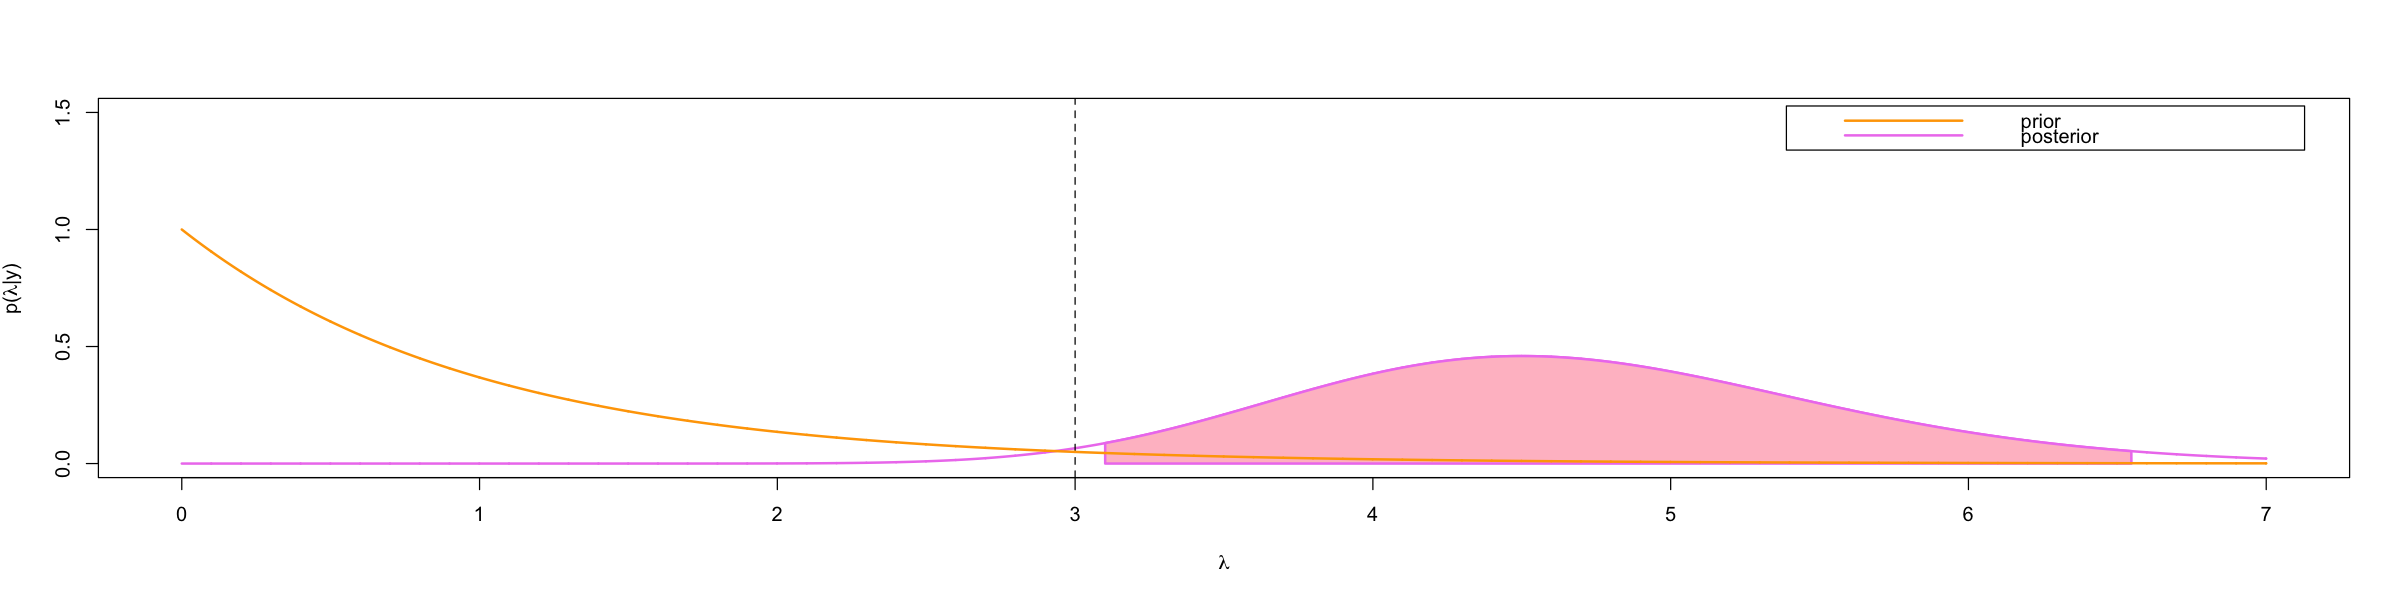

In [9]:
lambda <- seq(0,7, by = 0.001) # set up grid for plotting
lambda_true <- 3

plot(lambda, dgamma(lambda, alpha_1, beta_1), type = 'l', lwd = 2, col = 'violet',
     ylim = c(0, 1.5), xlab = expression(lambda),
     ylab = expression(paste('p(', lambda, '|y)')))

y_val <- dgamma(lambda, alpha_1, beta_1)
x_coord <- c(q_lower, lambda[lambda >= q_lower & lambda <= q_upper], q_upper)
y_coord <- c(0, y_val[lambda >= q_lower & lambda <= q_upper], 0)
polygon(x_coord, y_coord, col = 'pink', lwd = 2,  border = 'violet')
abline(v = lambda_true, lty = 2)

lines(lambda, dgamma(lambda, alpha, beta),
      type = 'l', lwd = 2, col = 'orange')
legend('topright', inset = .02, legend = c('prior', 'posterior'),
       col = c('orange', 'violet'), lwd = 2)

In [10]:
n_total <- 200
set.seed(111111) # use same seed, so first 5 obs. stay same
y_vec <- rpois(n_total, lambda_true)
head(y_vec)

[1]  4  3 11  3  6  3

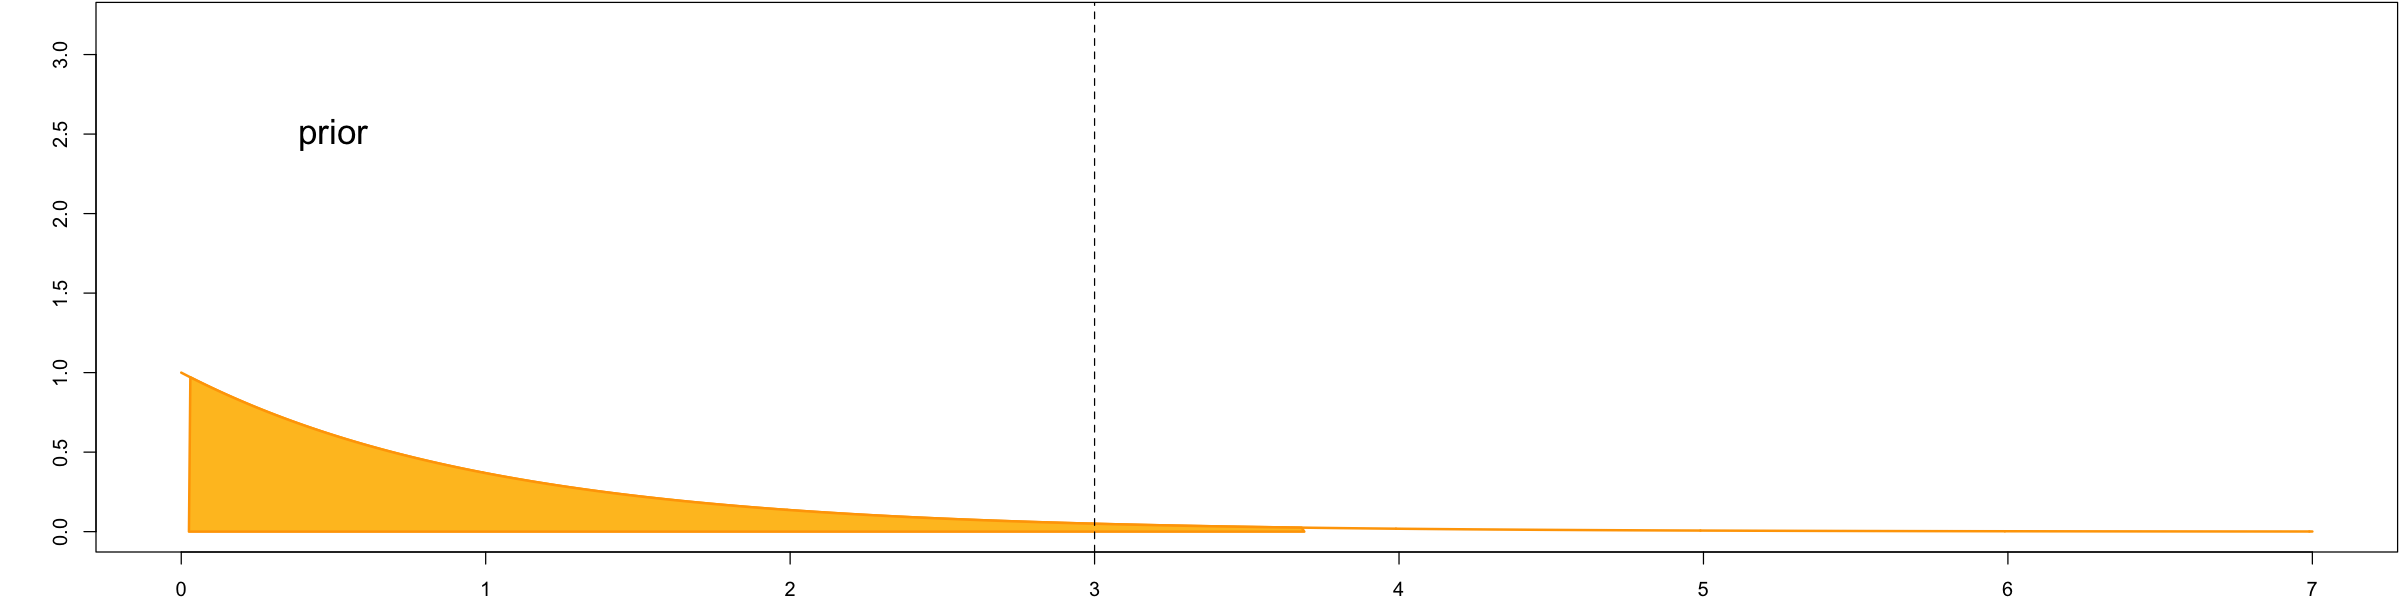

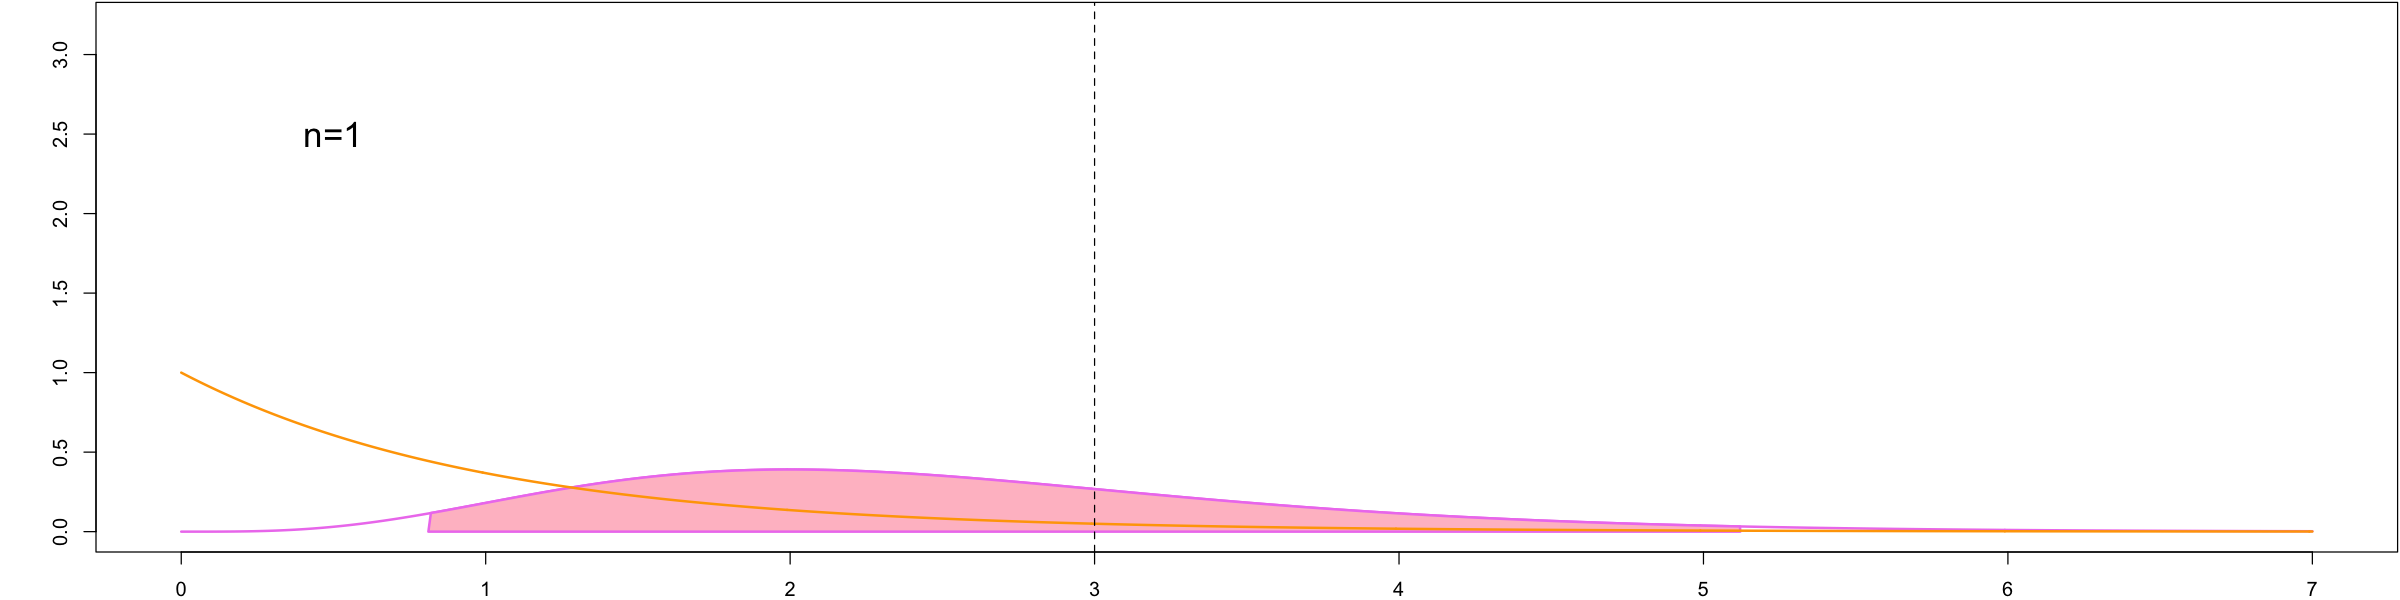

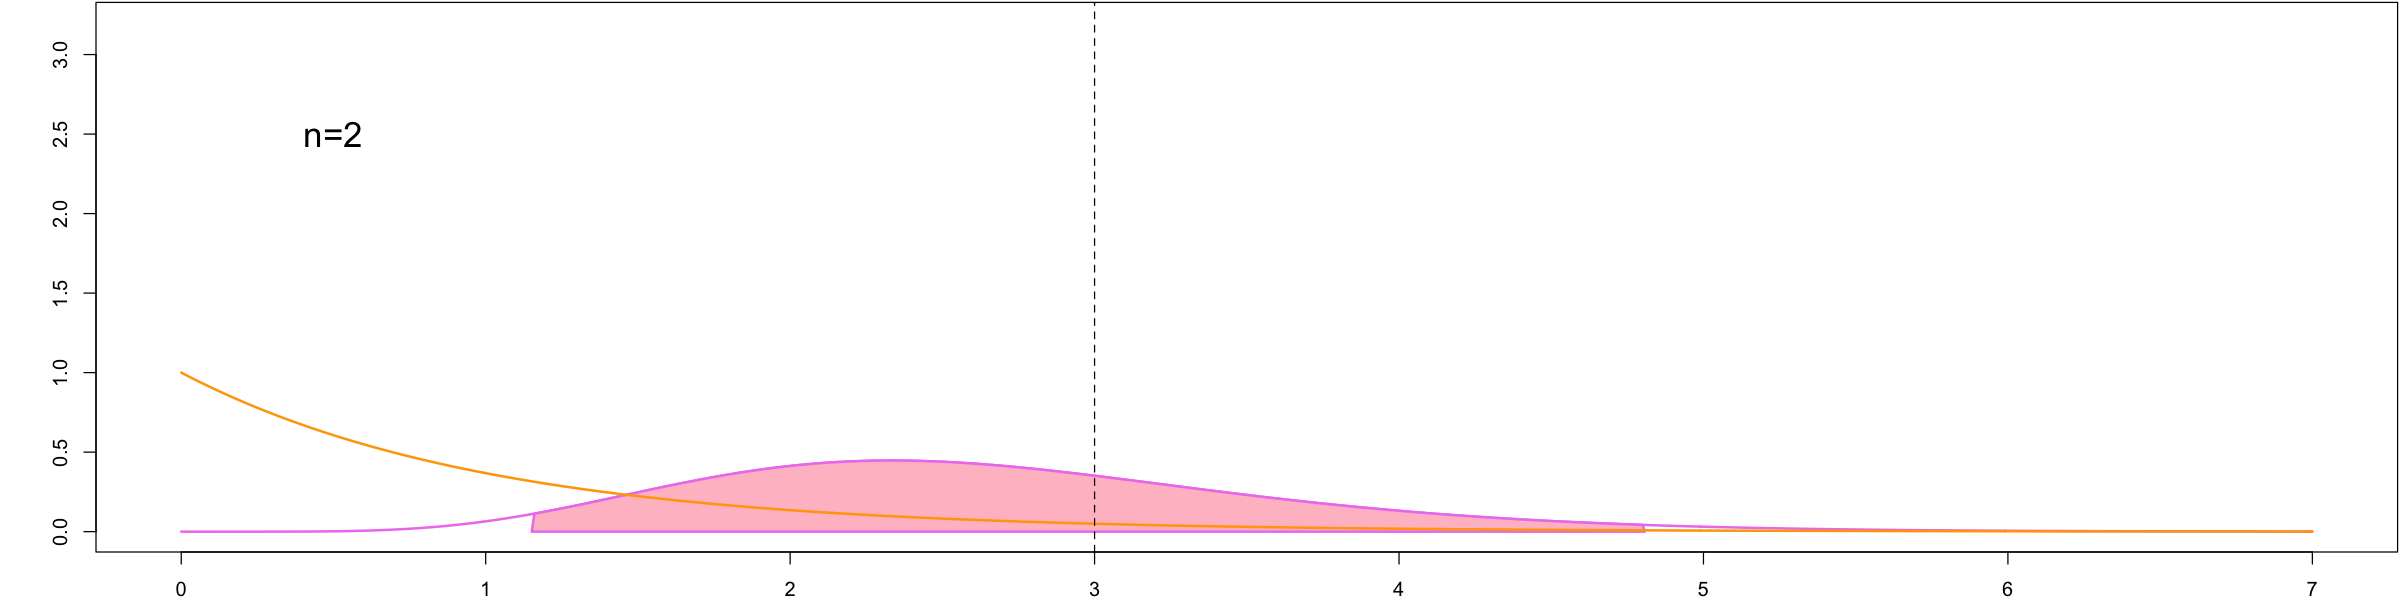

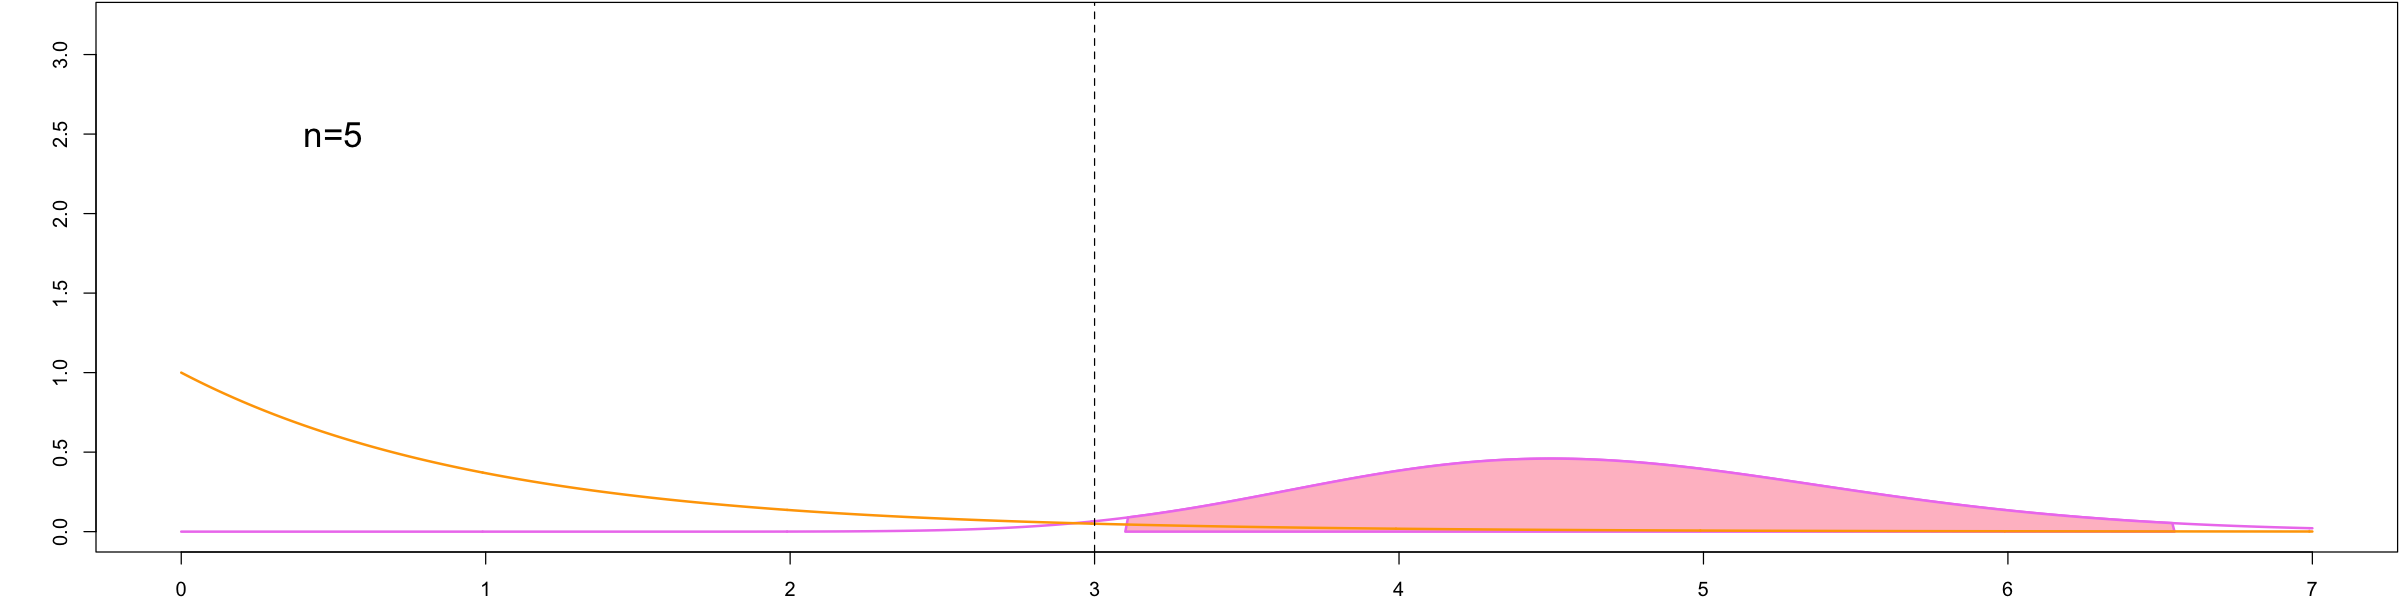

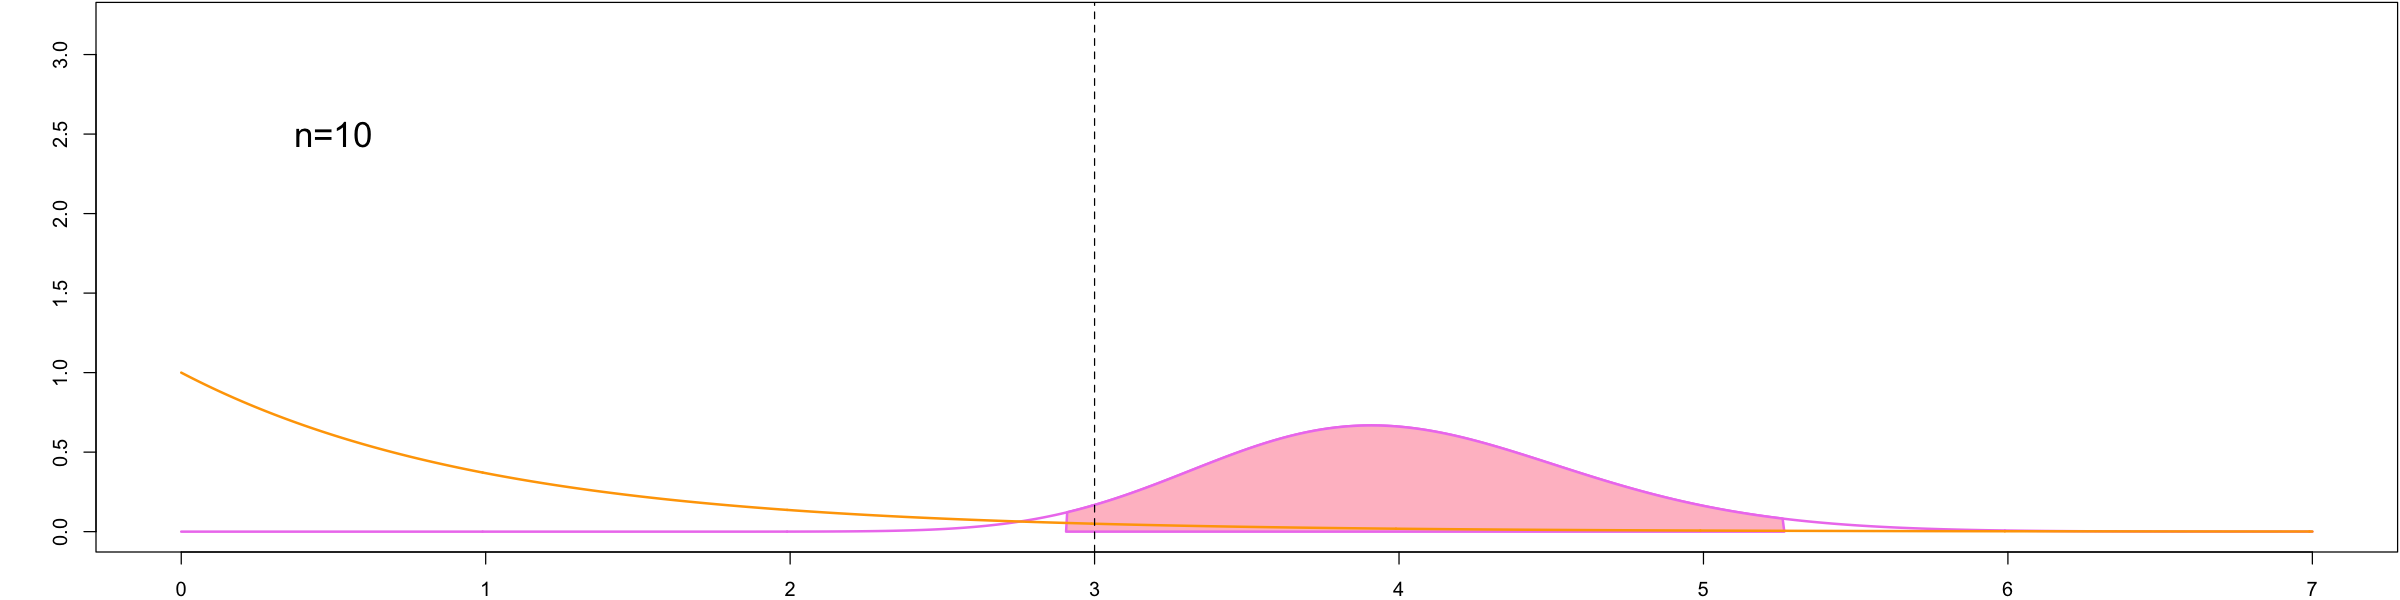

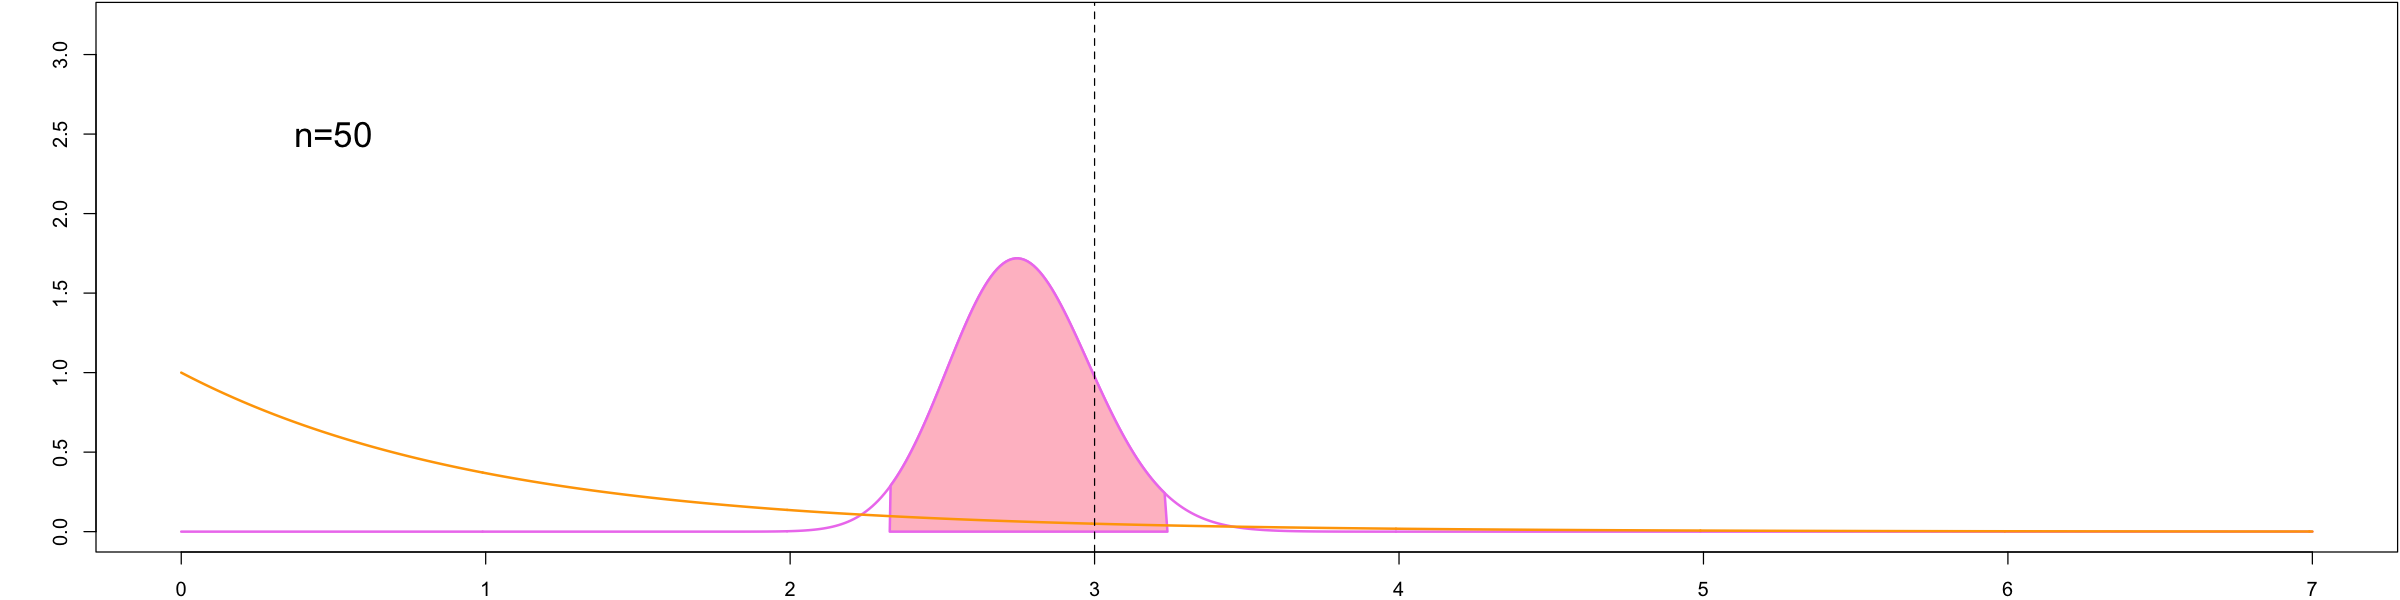

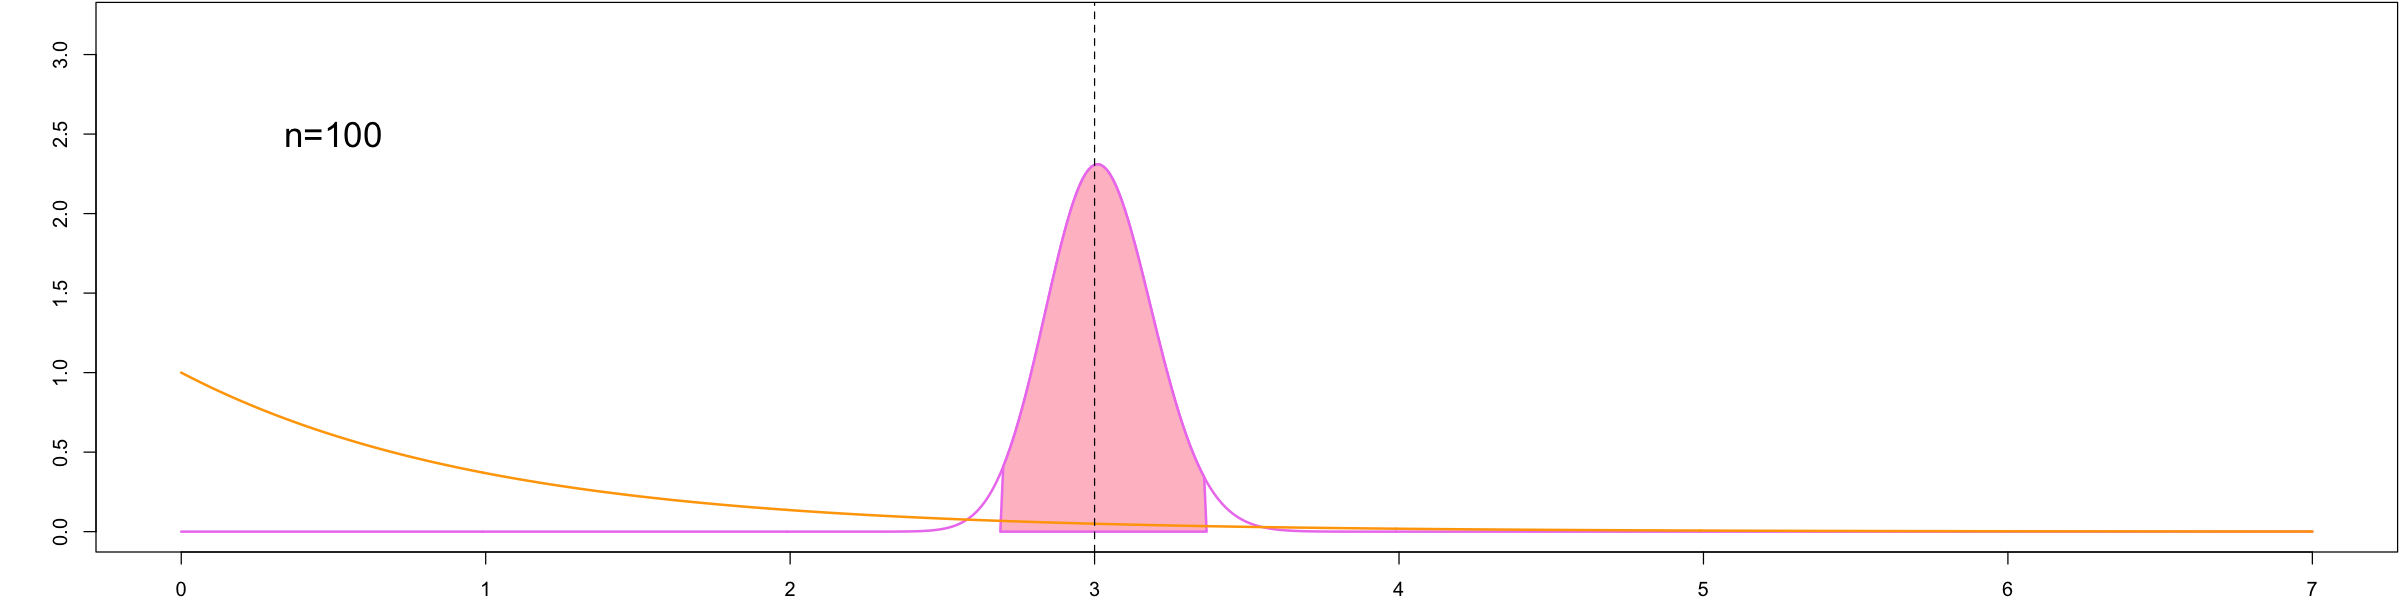

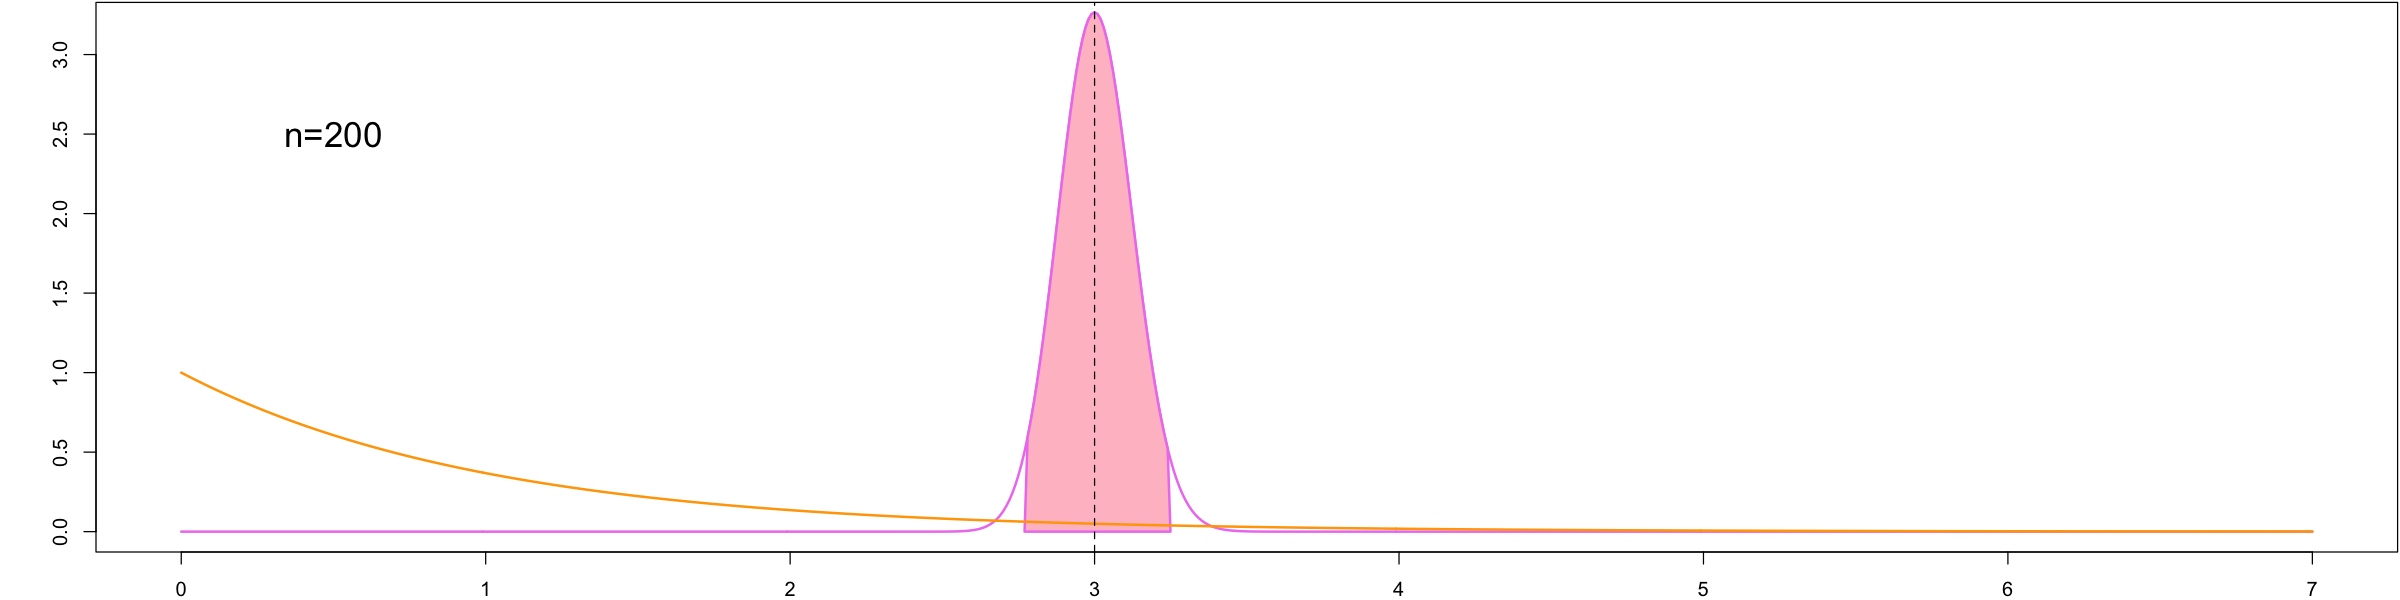

In [11]:
n_vec <- c(1, 2, 5, 10, 50, 100, 200)
#par(mfrow = c(8,1), mar = c(2, 4, .1, .1))
par(mar = c(2, 4, .1, .1))


plot_CI <- function(alpha, beta, y_vec, n_vec, alpha_conf, lambda_true) {
  lambda <- seq(0,7, by = 0.01) # set up grid for plotting
  plot(lambda, dgamma(lambda, alpha, beta), type = 'l', lwd = 2, col = 'orange',
     ylim = c(0, 3.2), xlab = '', ylab = '')
  q_lower <- qgamma(alpha_conf / 2, alpha, beta)
  q_upper <- qgamma(1 - alpha_conf / 2, alpha, beta)
  y_val <- dgamma(lambda, alpha, beta)
  polygon(c(q_lower, lambda[lambda >= q_lower & lambda <= q_upper], q_upper),
          c(0, y_val[lambda >= q_lower & lambda <= q_upper], 0),
          col = 'goldenrod1', lwd = 2,  border = 'orange')

  abline(v = lambda_true, lty = 2)
  text(x = 0.5, y = 2.5, 'prior', cex = 1.75)

  for(n_crnt in n_vec) {
    y_sum <- sum(y_vec[1:n_crnt])
    alpha_1 <- alpha + y_sum
    beta_1 <- beta + n_crnt

    plot(lambda, dgamma(lambda, alpha_1, beta_1), type = 'l', lwd = 2, col = 'violet',
       ylim = c(0, 3.2), xlab = '', ylab = '')
    q_lower <- qgamma(alpha_conf / 2, alpha_1, beta_1)
    q_upper <- qgamma(1 - alpha_conf / 2, alpha_1, beta_1)
    y_val <- dgamma(lambda, alpha_1, beta_1)
    x_coord <- c(q_lower, lambda[lambda >= q_lower & lambda <= q_upper], q_upper)
    y_coord <- c(0, y_val[lambda >= q_lower & lambda <= q_upper], 0)
    polygon(x_coord, y_coord, col = 'pink', lwd = 2,  border = 'violet')
    lines(lambda, dgamma(lambda, alpha, beta),
        type = 'l', lwd = 2, col = 'orange')
    abline(v = lambda_true, lty = 2)
    text(x = 0.5, y = 2.5, paste0('n=', n_crnt), cex = 1.75)
  }
}

plot_CI(alpha, beta, y_vec, n_vec, alpha_conf, lambda_true)


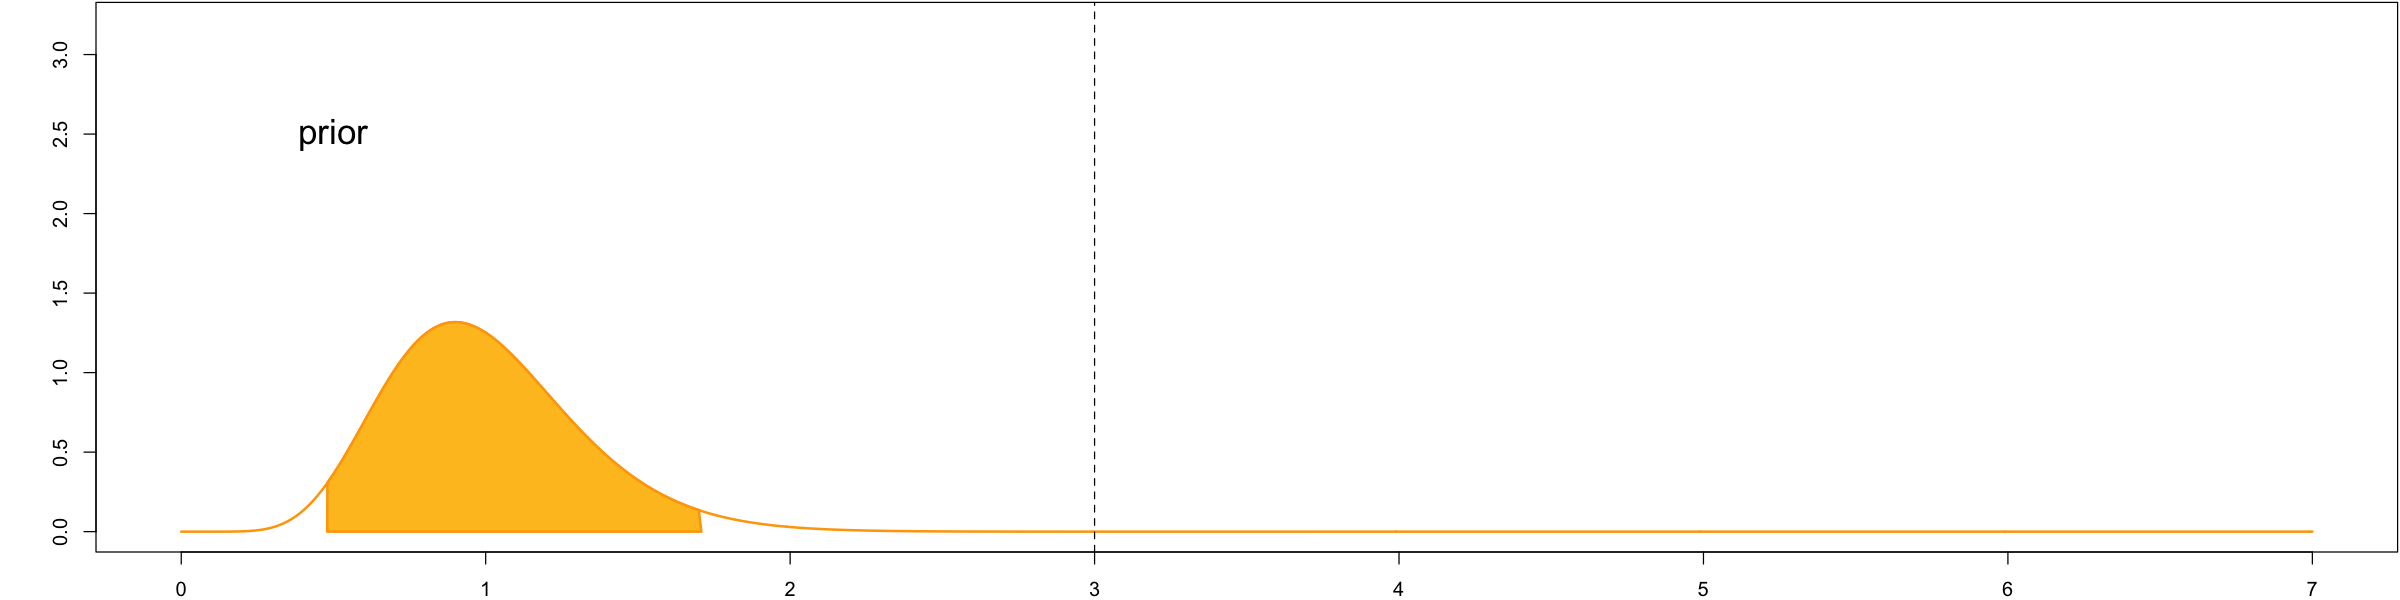

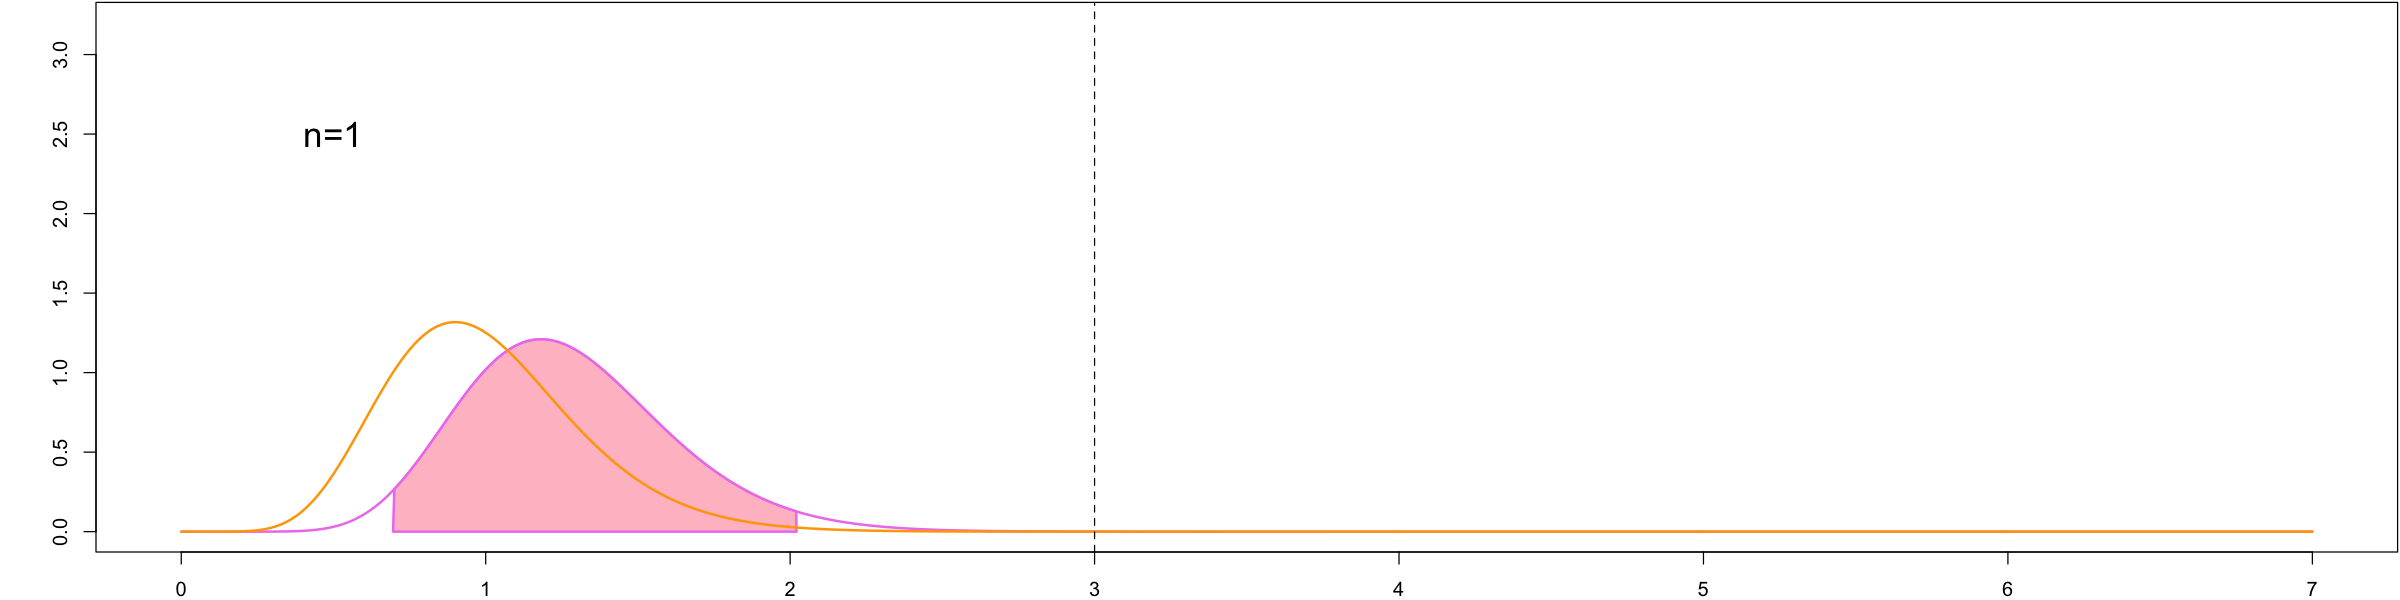

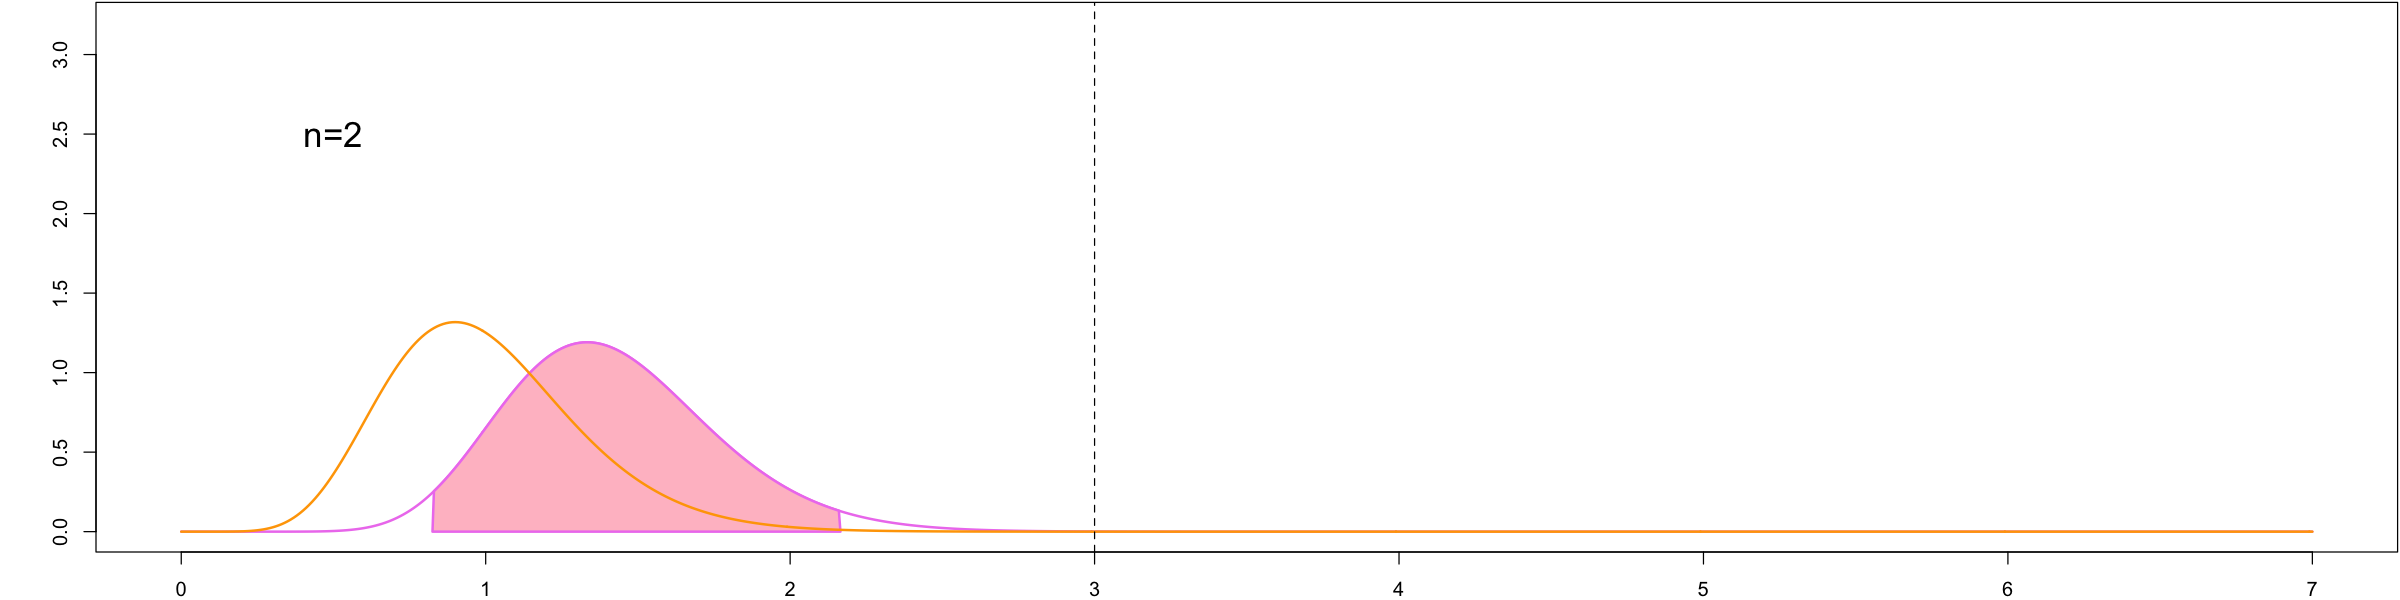

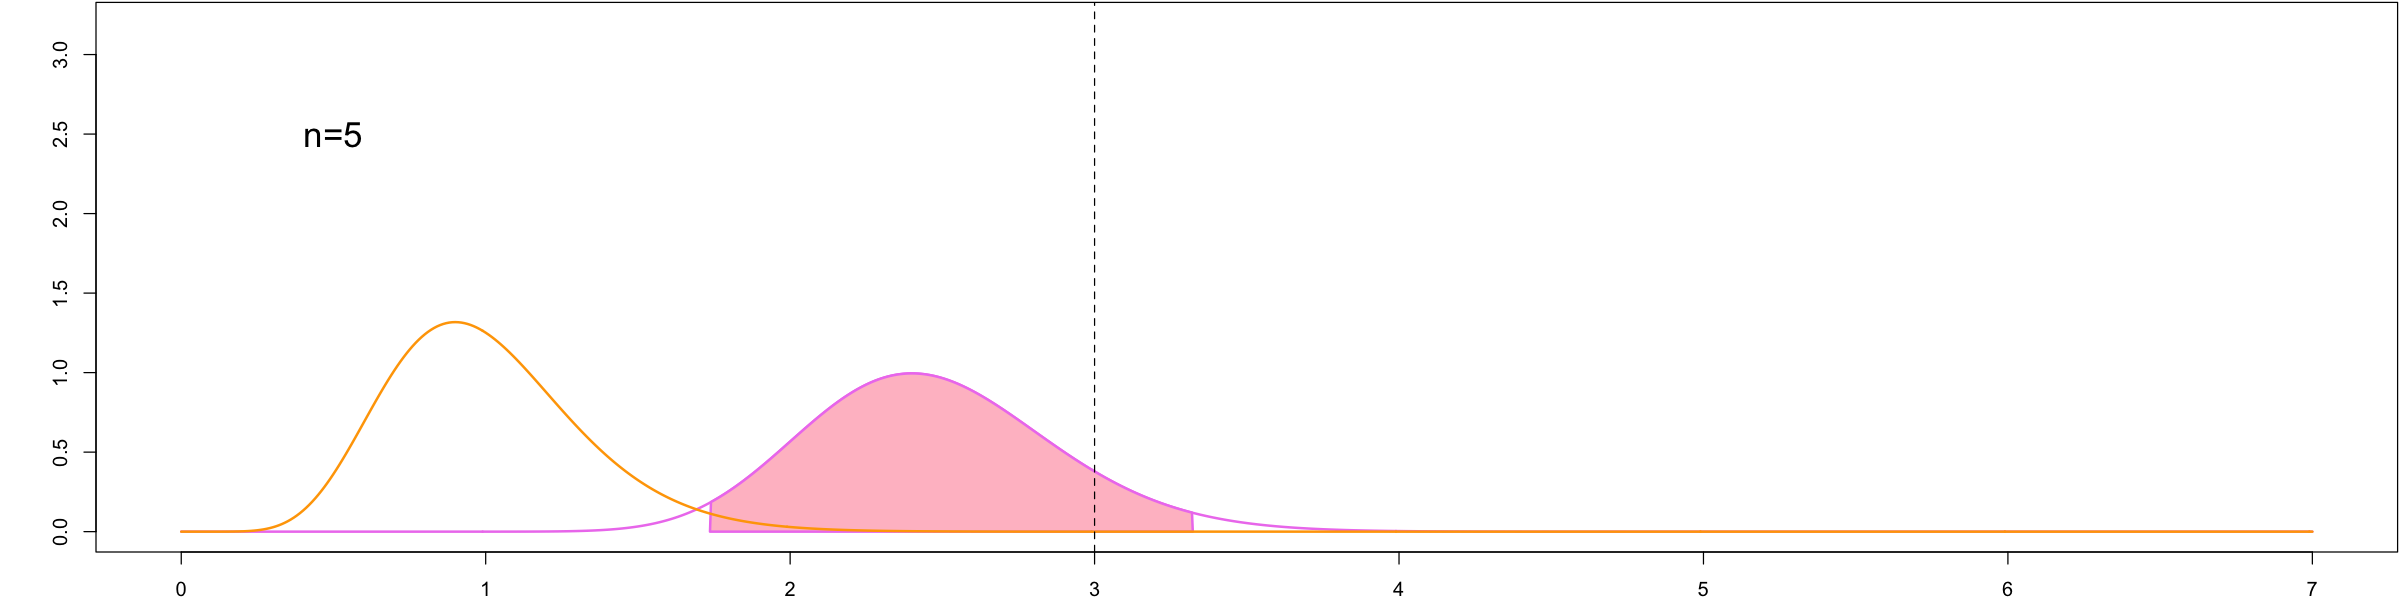

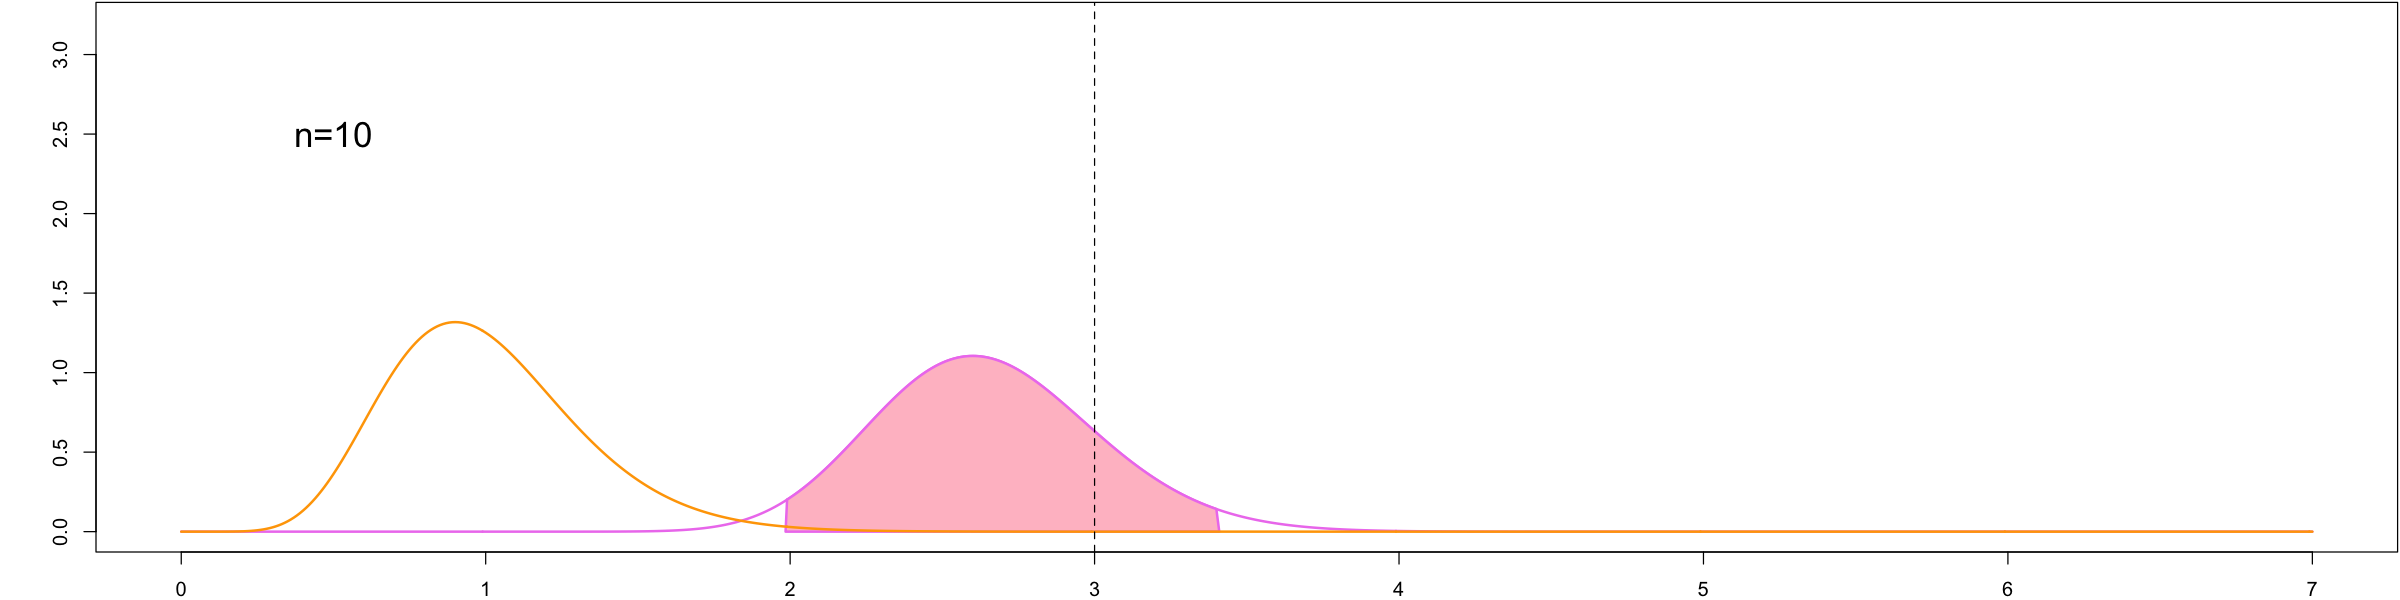

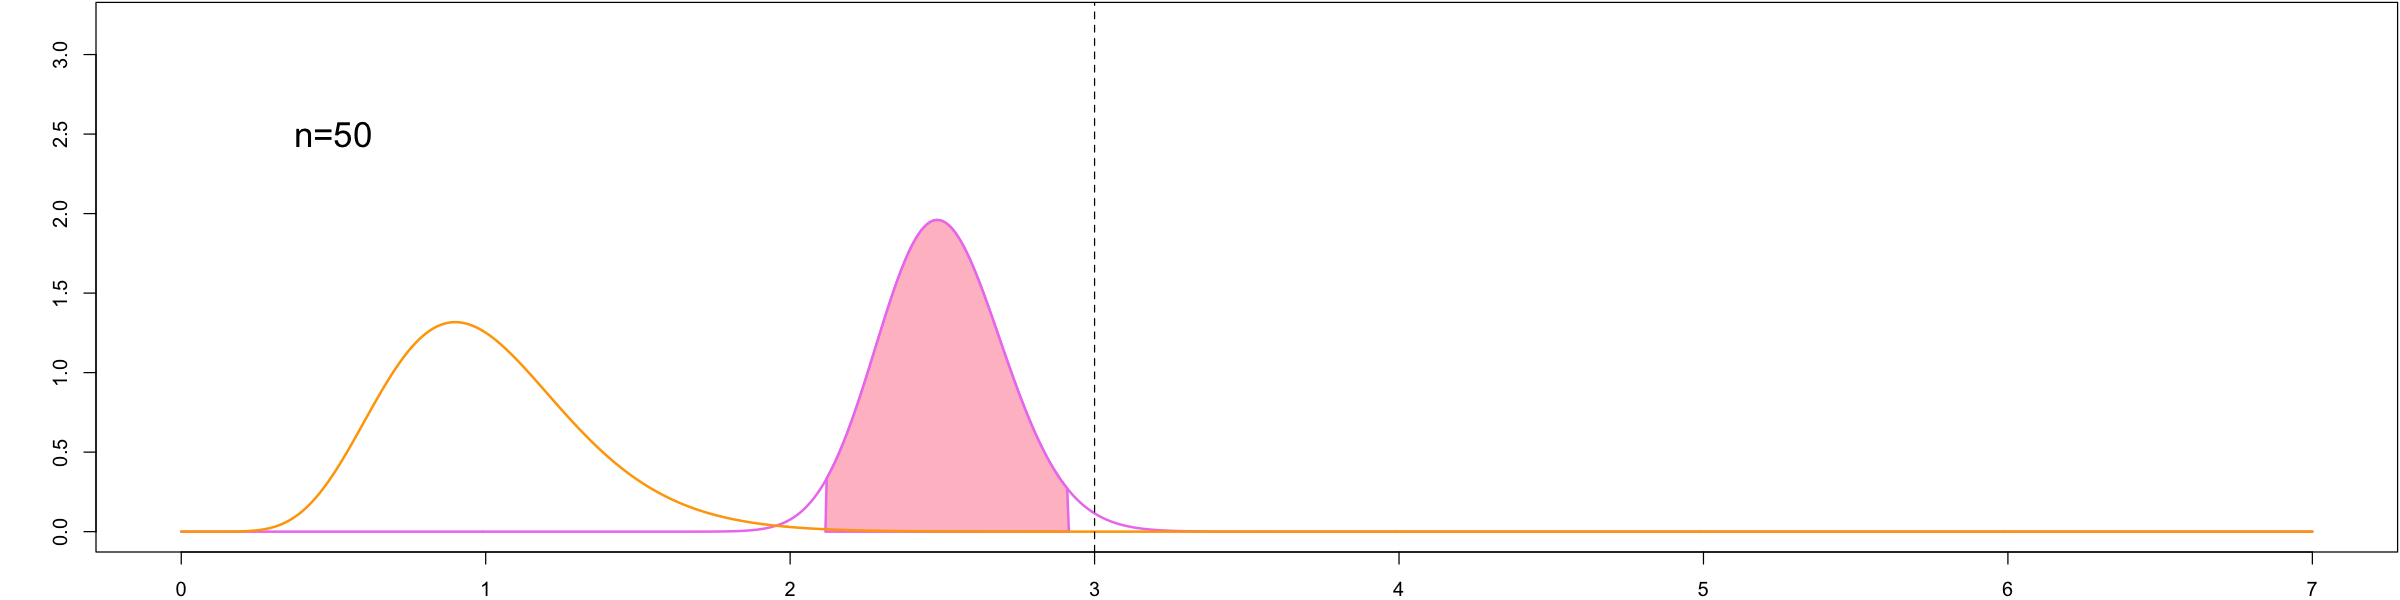

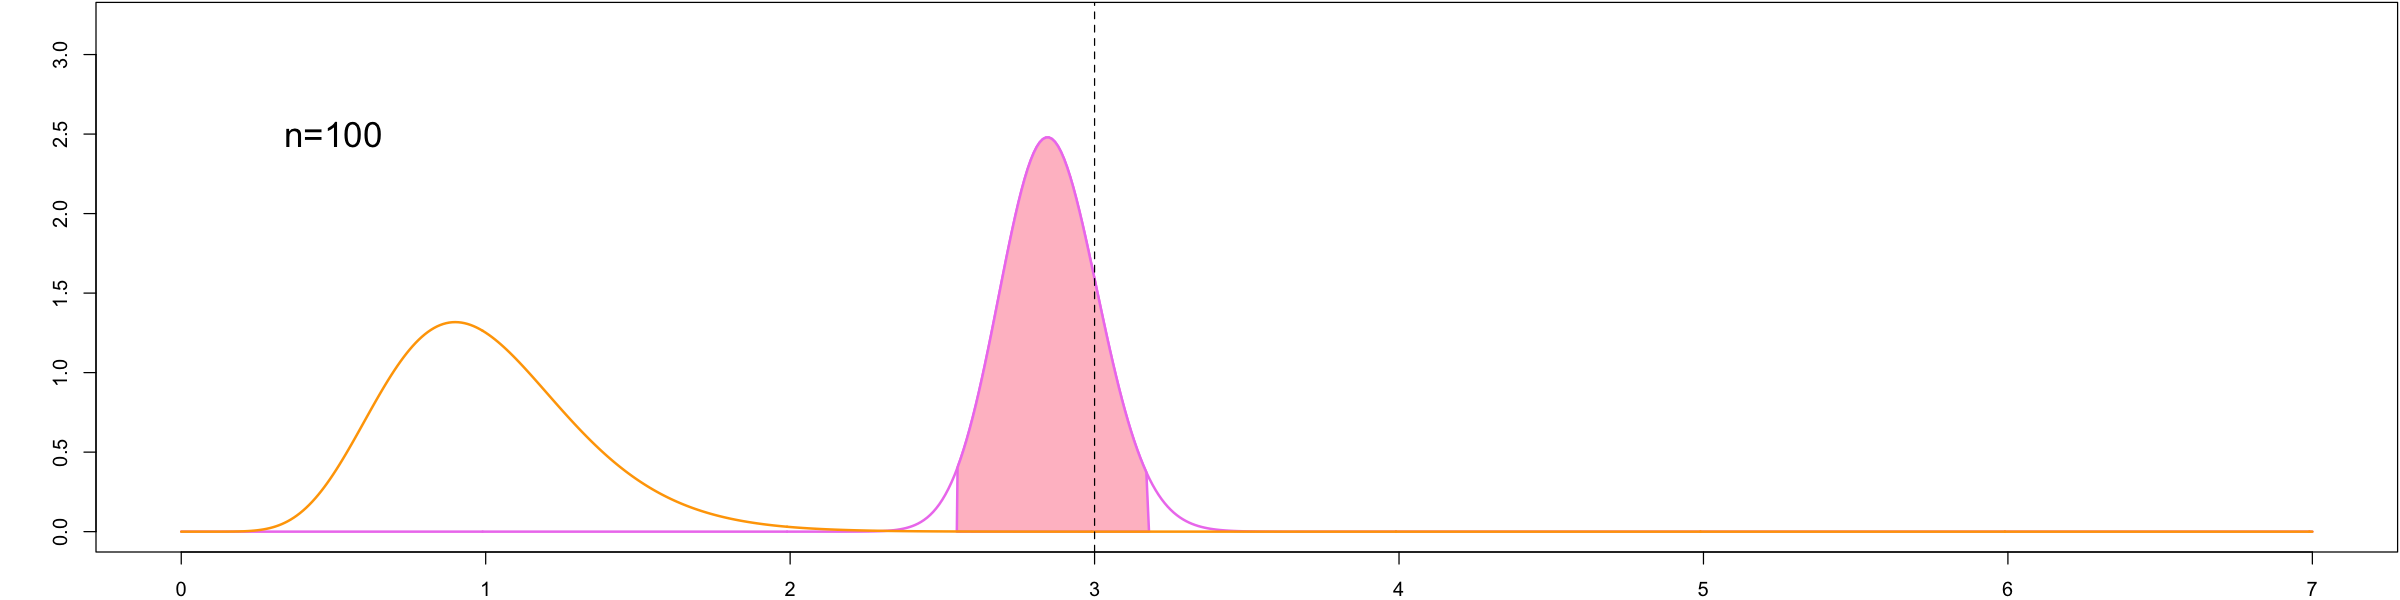

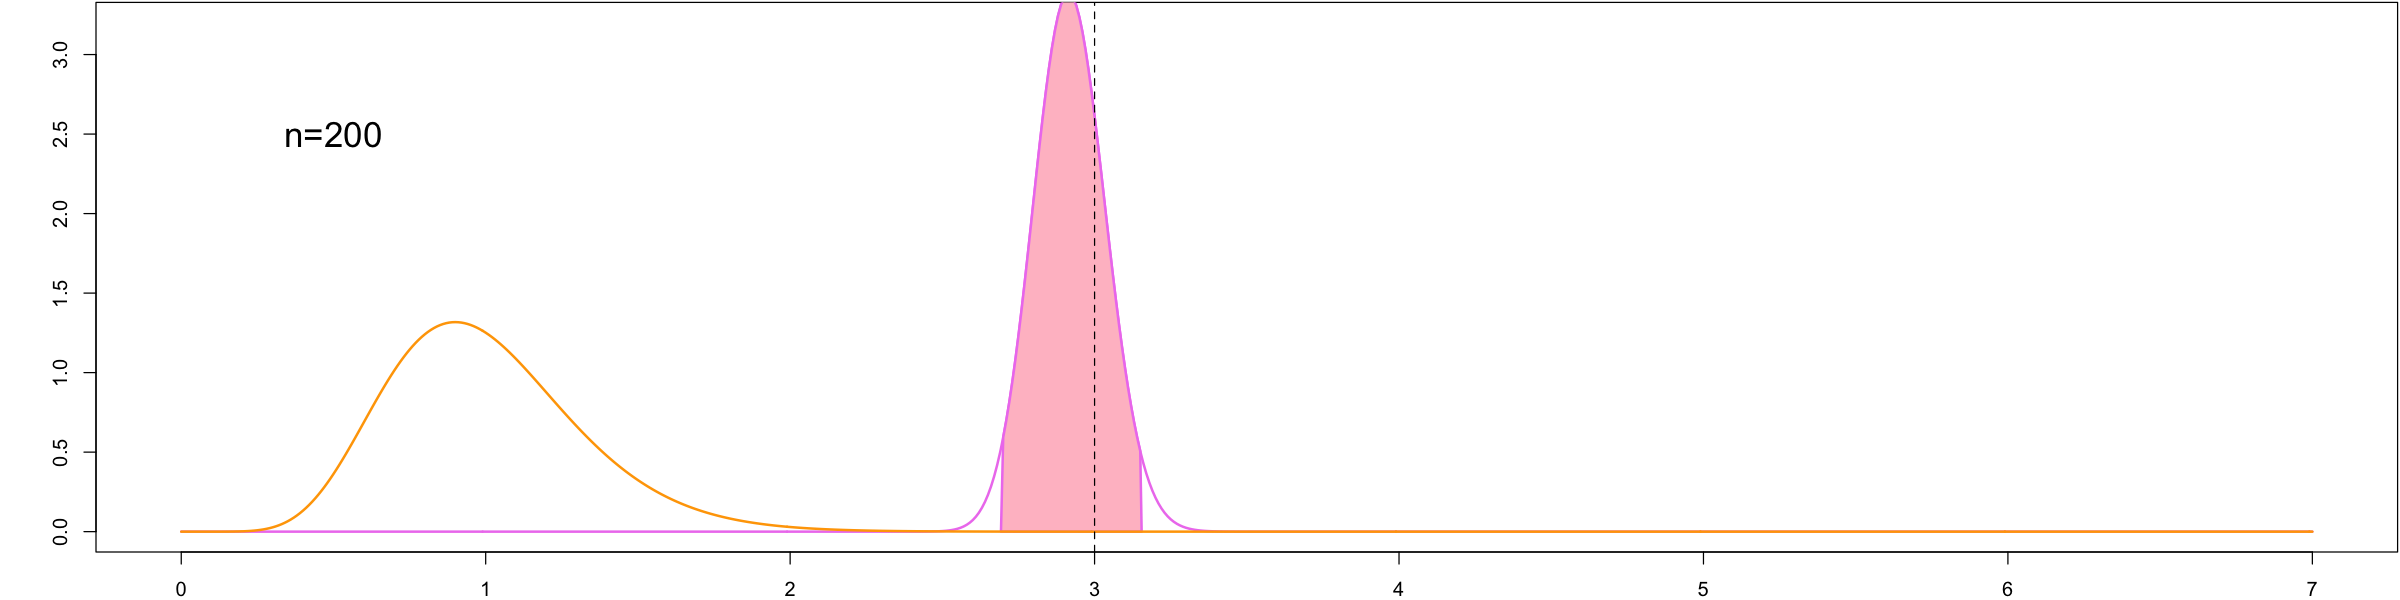

In [12]:
#par(mfrow = c(4,2), mar = c(2, 2, .1, .1))
par(mar = c(2, 4, .1, .1))
plot_CI(alpha = 10, beta = 10, y_vec, n_vec, alpha_conf, lambda_true)

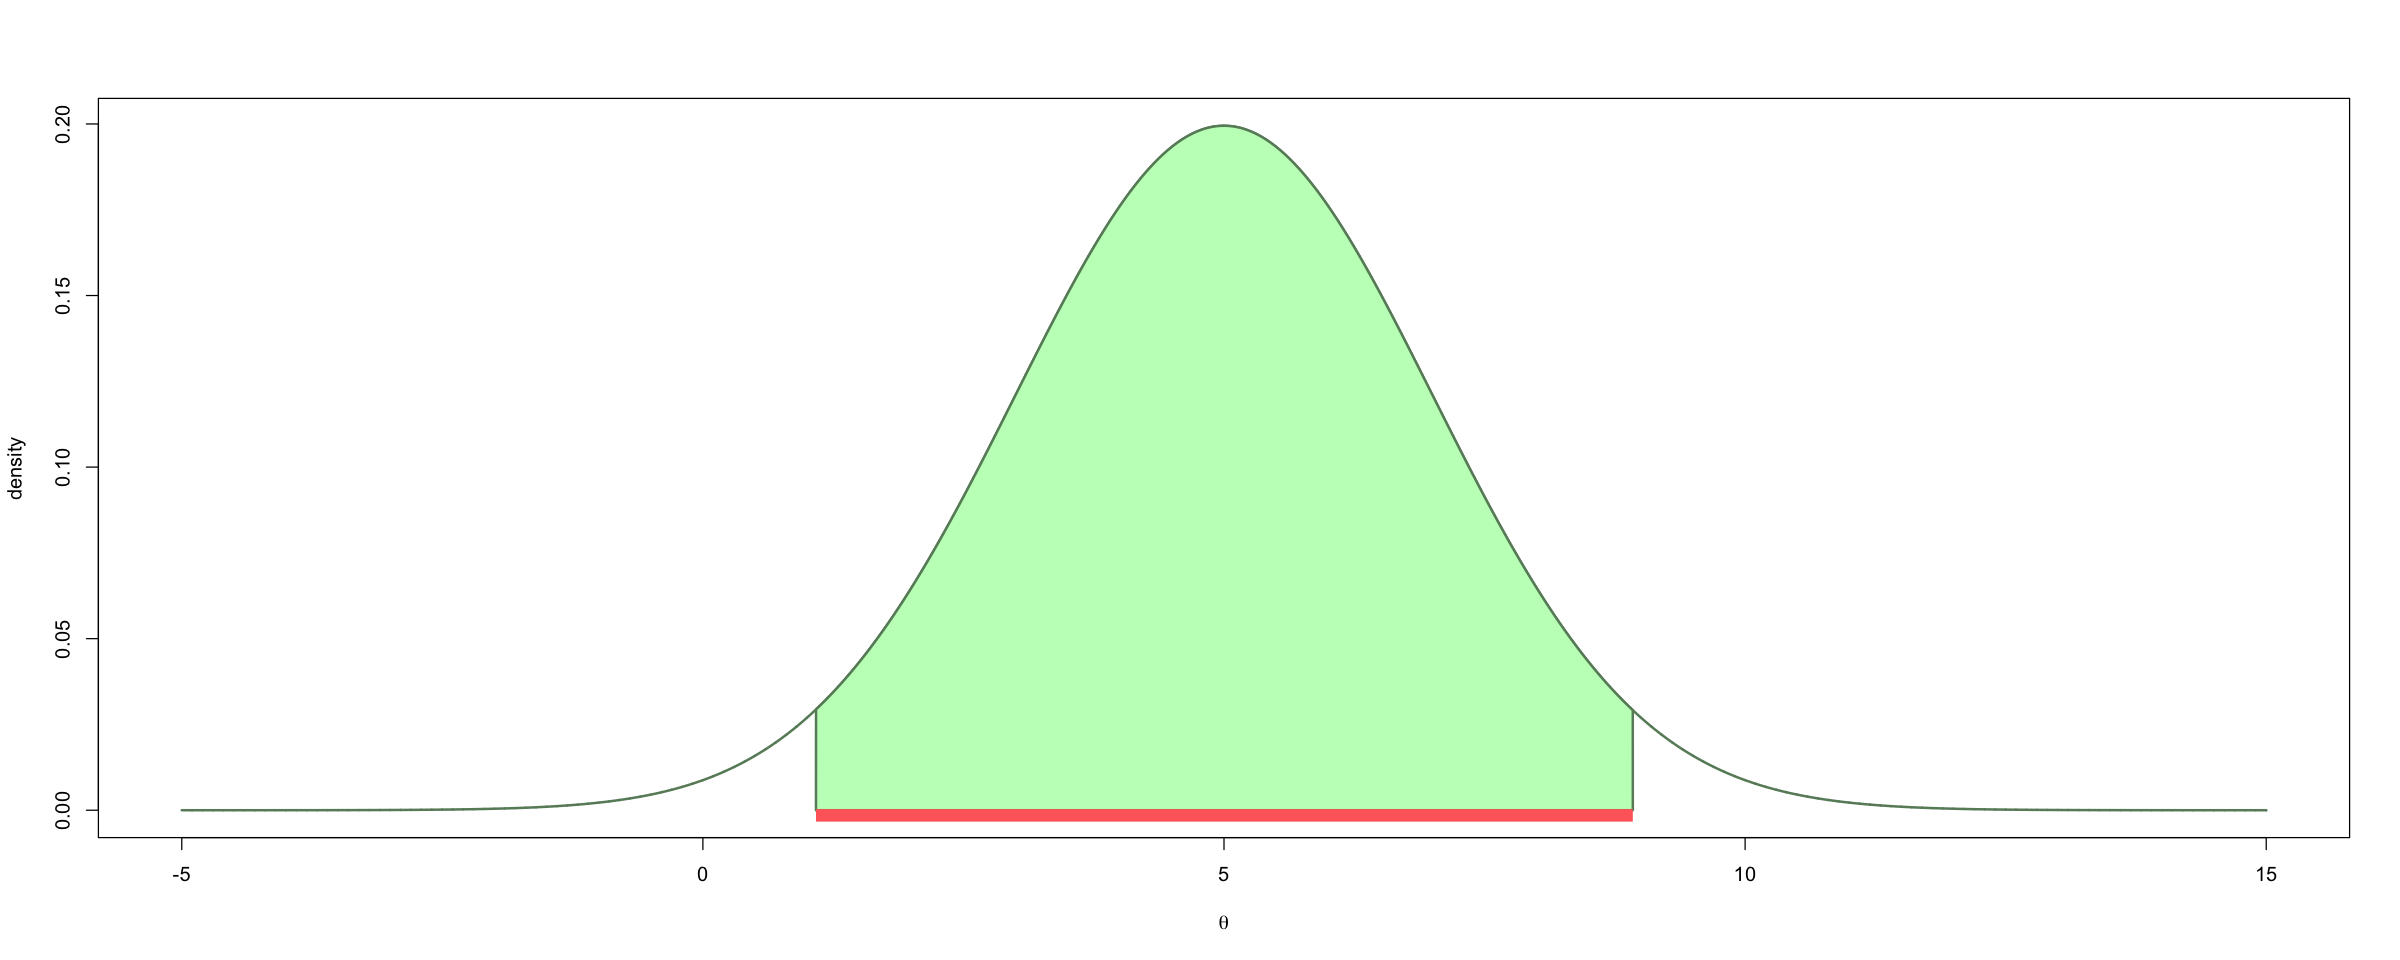

In [294]:
alpha_conf <- .05

mu <- 5
sigma <- 2

# generate data to compute empirical quantiles
n_sim <- 1000000
theta <- sort(c(rnorm(n_sim, mu, sigma)))

lower_idx <- round((alpha_conf / 2) * n_sim)
upper_idx <- round((1 - alpha_conf / 2) * n_sim)
q_lower <- theta[lower_idx]
q_upper <- theta[upper_idx]

x <- seq(-5, 15, by = 0.001)
y_val <- dnorm(x, mu, sigma)
x_coord <- c(q_lower, x[x >= q_lower & x <= q_upper], q_upper)
y_coord <- c(0, y_val[x >= q_lower & x <= q_upper], 0)

plot(x, dnorm(x, mu, sigma),
     type='l', col = 'darkseagreen4', lwd = 2,
     xlab = expression(theta), ylab = 'density')


polygon(x_coord, y_coord, col = 'darkseagreen1', lwd = 2,  border = 'darkseagreen4')

segments(q_lower, -0.0015, q_upper, -0.0015, lwd=10, col='indianred1', lend='butt')

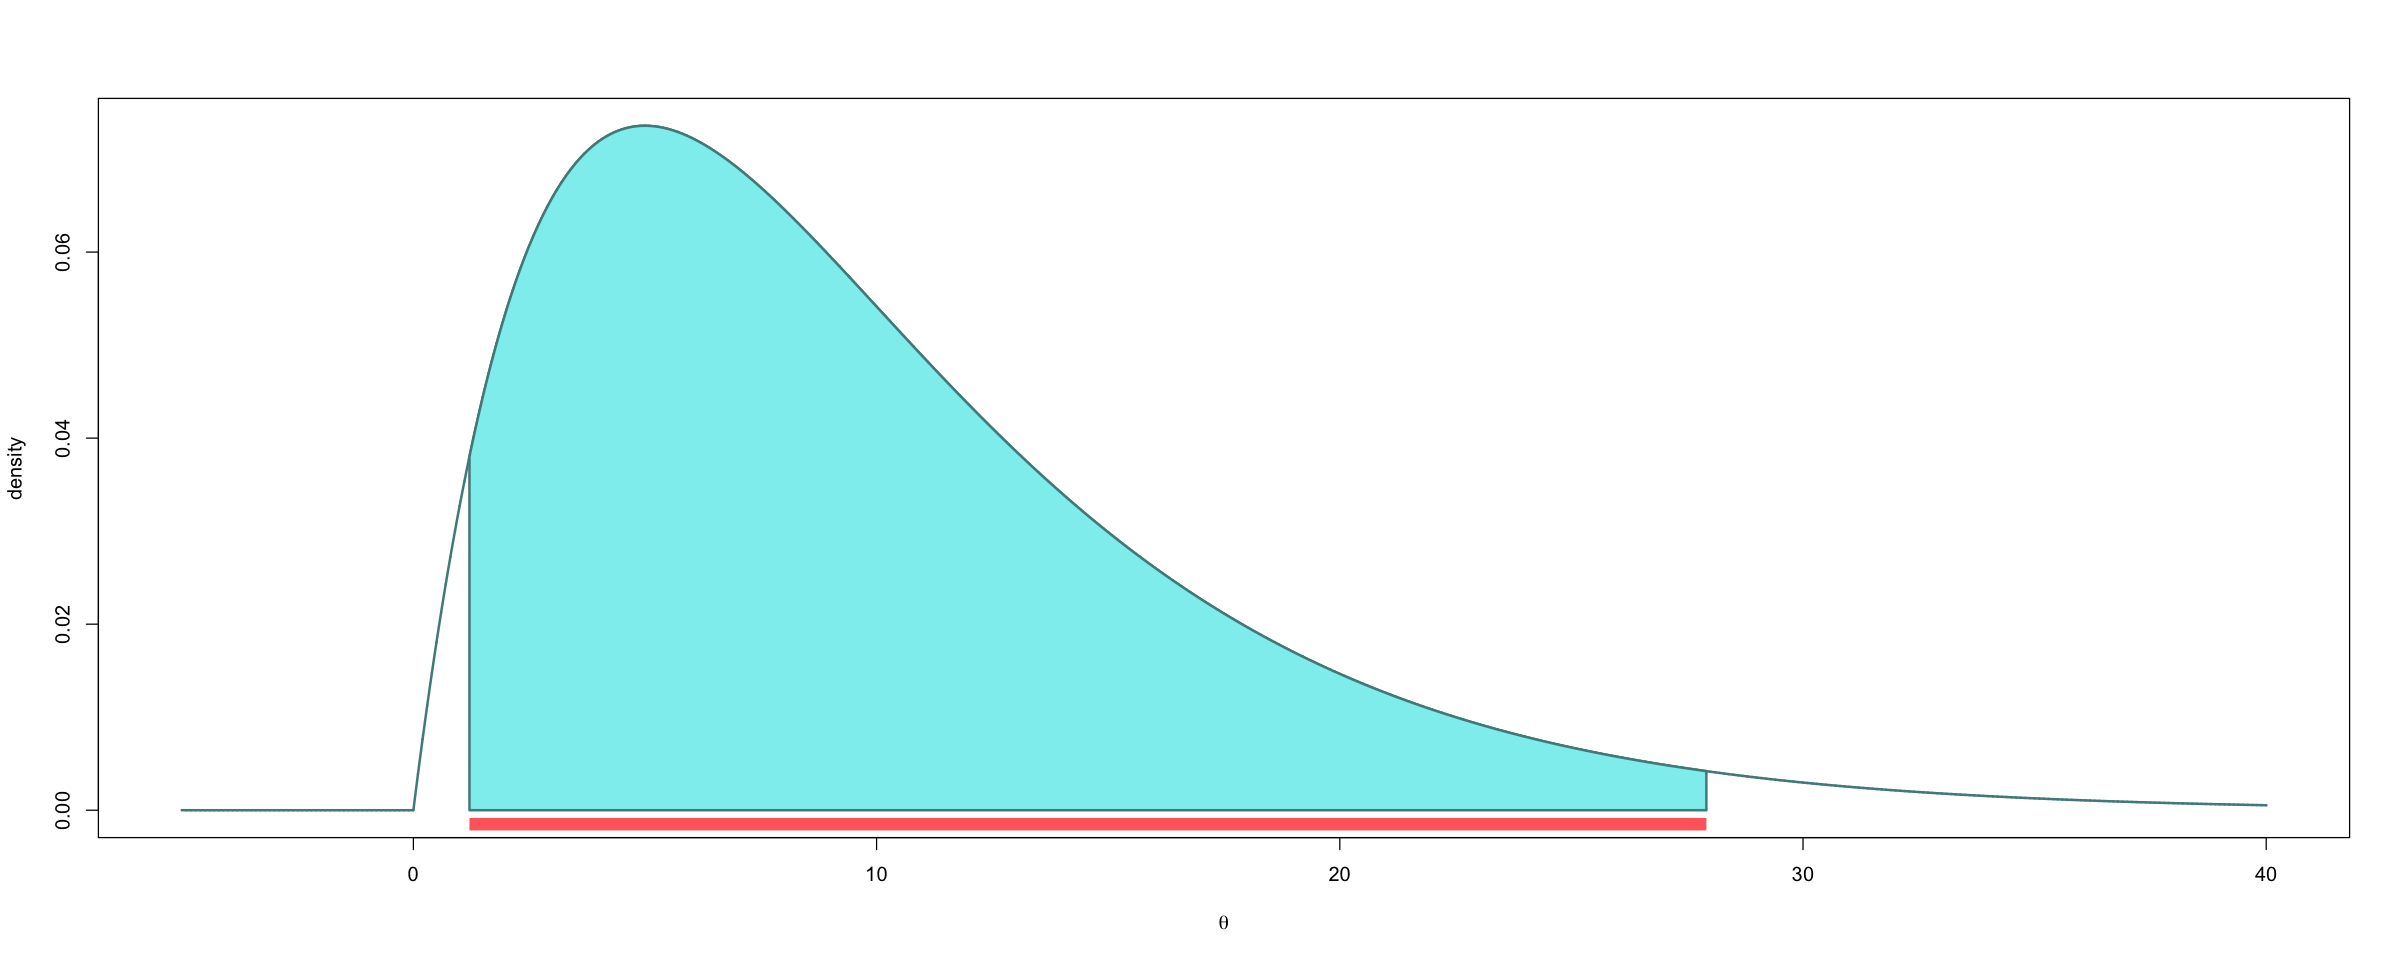

In [295]:
alpha_conf <- .05

alpha_1 <- 2
beta_1 <- 0.2

# generate data to compute empirical quantiles
n_sim <- 1000000
theta <- sort(c(rgamma(n_sim, alpha_1, beta_1)))

lower_idx <- round((alpha_conf / 2) * n_sim)
upper_idx <- round((1 - alpha_conf / 2) * n_sim)
q_lower <- theta[lower_idx]
q_upper <- theta[upper_idx]

x <- seq(-5, 40, by = 0.001)
y_val <- dgamma(x, alpha_1, beta_1)
x_coord <- c(q_lower, x[x >= q_lower & x <= q_upper], q_upper)
y_coord <- c(0, y_val[x >= q_lower & x <= q_upper], 0)

plot(x, dgamma(x, alpha_1, beta_1),
     type='l', col = 'darkslategray4', lwd = 2,
     xlab = expression(theta), ylab = 'density')


polygon(x_coord, y_coord, col = 'darkslategray2', lwd = 2,  border = 'darkslategray4')

segments(q_lower, -0.0015, q_upper, -0.0015, lwd=10, col='indianred1', lend='butt')

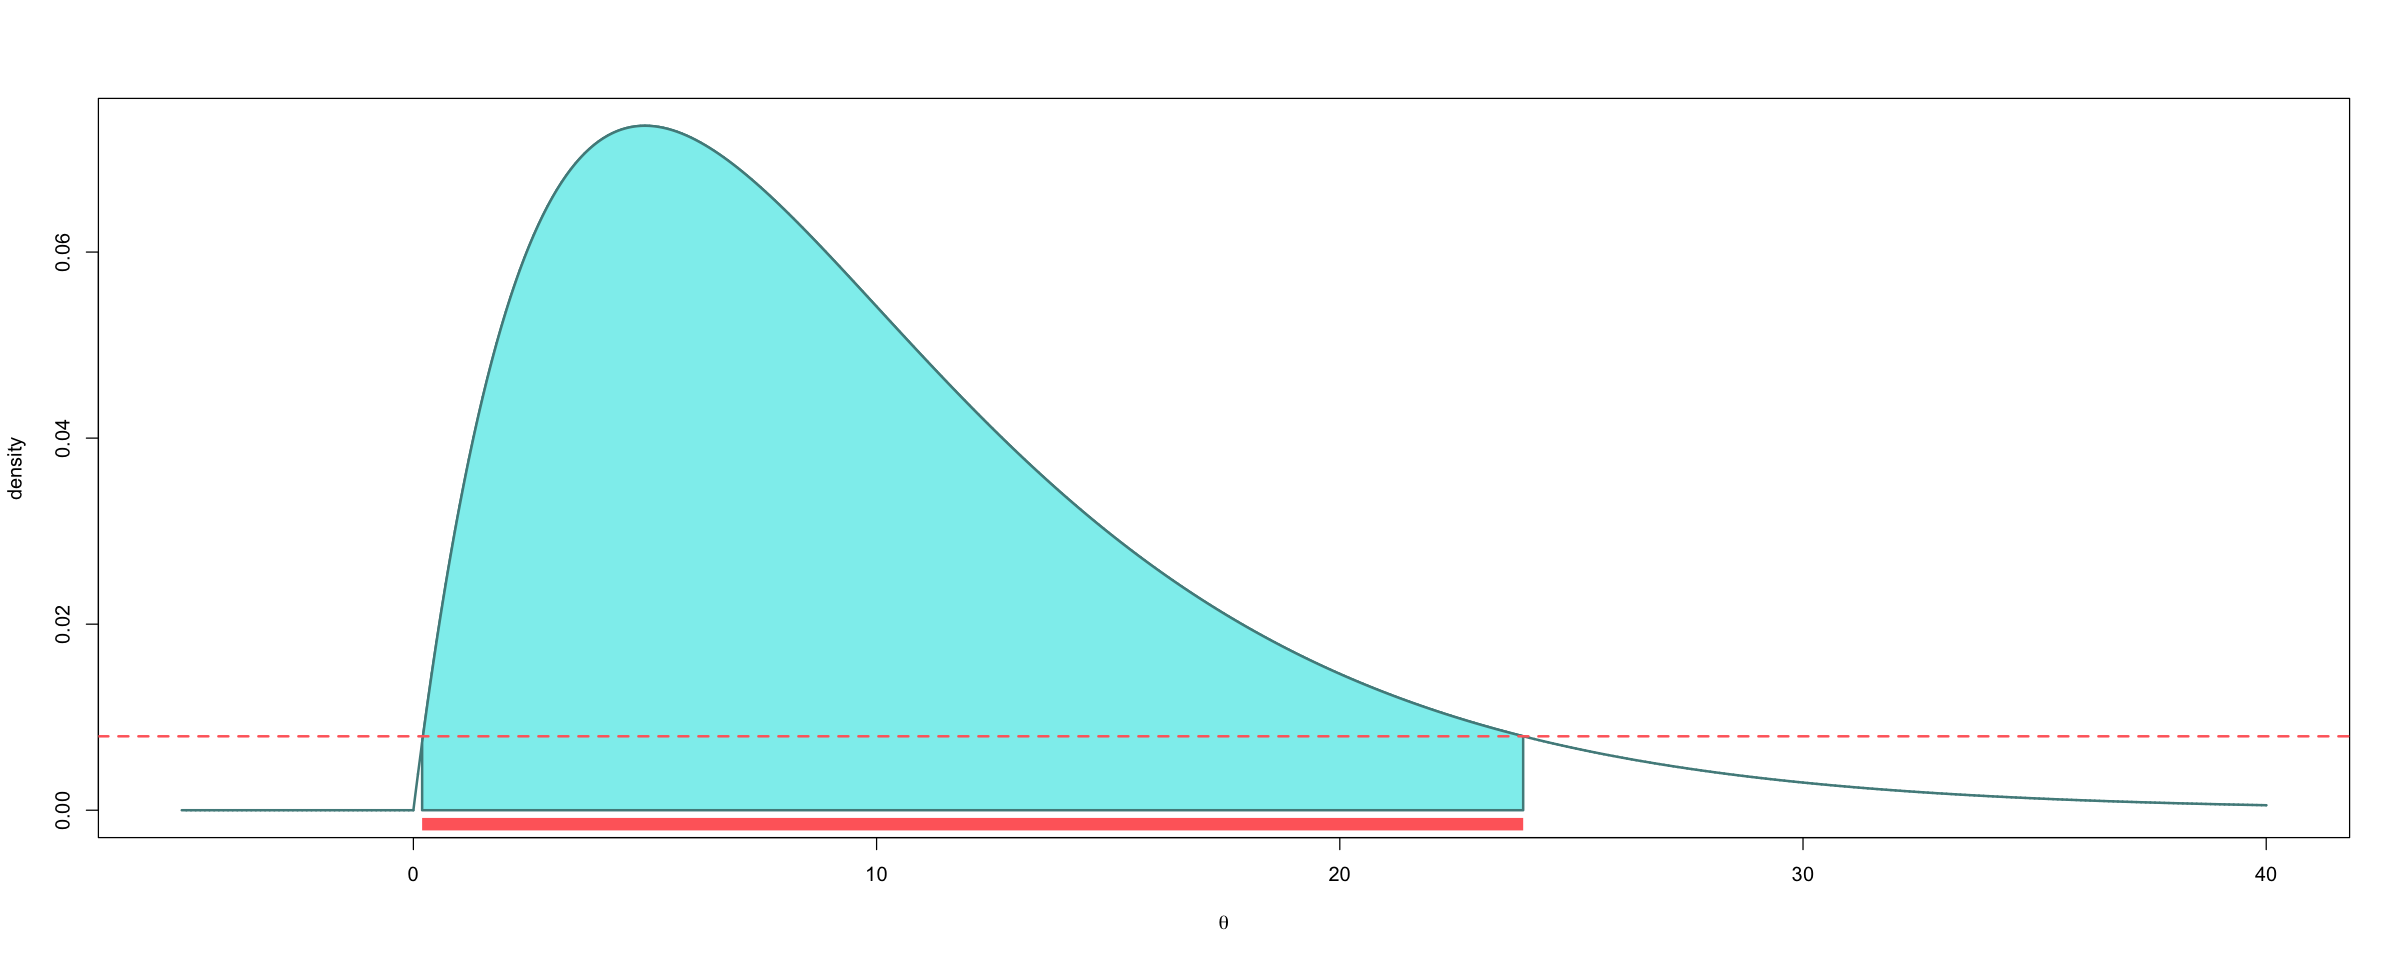

In [297]:

dens <- density(theta)
HPD_region <- HDInterval::hdi(dens, allowSplit = TRUE)
height <- attr(HPD_region, 'height')
lower <- HPD_region[1,1]
upper <- HPD_region[1,2]

x_coord <- c(lower, x[x >= lower & x <= upper], upper)
y_coord <- c(0, y_val[x >= lower & x <= upper], 0)

plot(x, dgamma(x, alpha_1, beta_1),
     type='l', col = 'darkslategray4', lwd = 2,
     xlab = expression(theta), ylab = 'density')
polygon(x_coord, y_coord, col = 'darkslategray2', lwd = 2,  border = 'darkslategray4')


abline(h = height, col = 'indianred1', lty = 2, lwd = 2)

segments(lower, -0.0015, upper, -0.0015, lwd=10, col='indianred1', lend='butt')

In [ ]:
# Exponential density function of mean 10
dexp(x, rate = 0.1) # E(X) = 1/lambda = 1/0.1 = 10

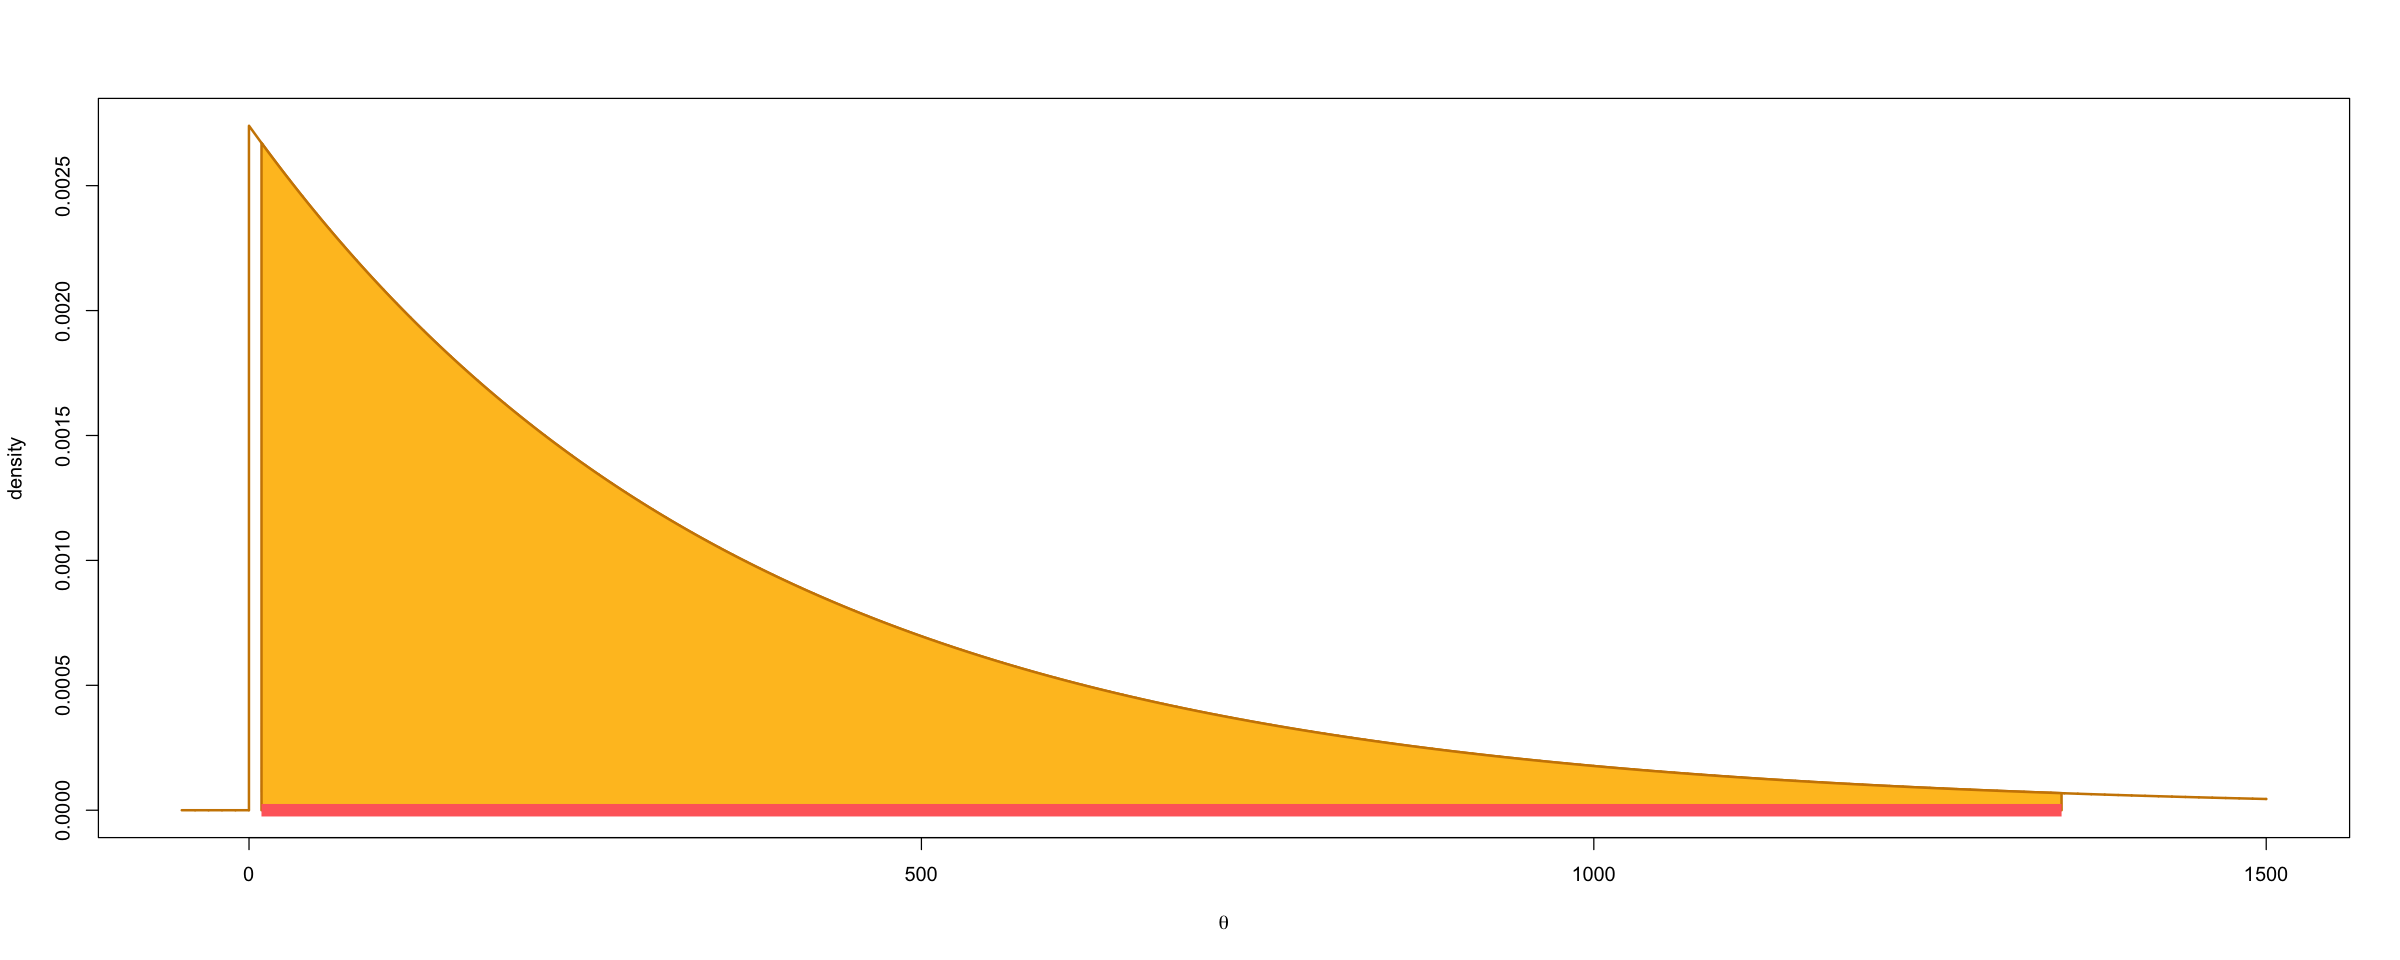

In [313]:
alpha_conf <- .05

mean <- 365
lambda <- 1 / mean

# generate data to compute empirical quantiles
n_sim <- 1000000
theta <- sort(c(rexp(n_sim,lambda)))

lower_idx <- round((alpha_conf / 2) * n_sim)
upper_idx <- round((1 - alpha_conf / 2) * n_sim)
q_lower <- theta[lower_idx]
q_upper <- theta[upper_idx]

x <- seq(-50, 1500, by = 0.1)
y_val <- dexp(x, lambda)
x_coord <- c(q_lower, x[x >= q_lower & x <= q_upper], q_upper)
y_coord <- c(0, y_val[x >= q_lower & x <= q_upper], 0)

plot(x, dexp(x, lambda),
     type='l', col = 'orange3', lwd = 2,
     xlab = expression(theta), ylab = 'density')


polygon(x_coord, y_coord, col = 'goldenrod1', lwd = 2,  border = 'orange3')

segments(q_lower, 0, q_upper, 0, lwd=10, col='indianred1', lend='butt')

In [269]:
q_lower

[1] 9.168126

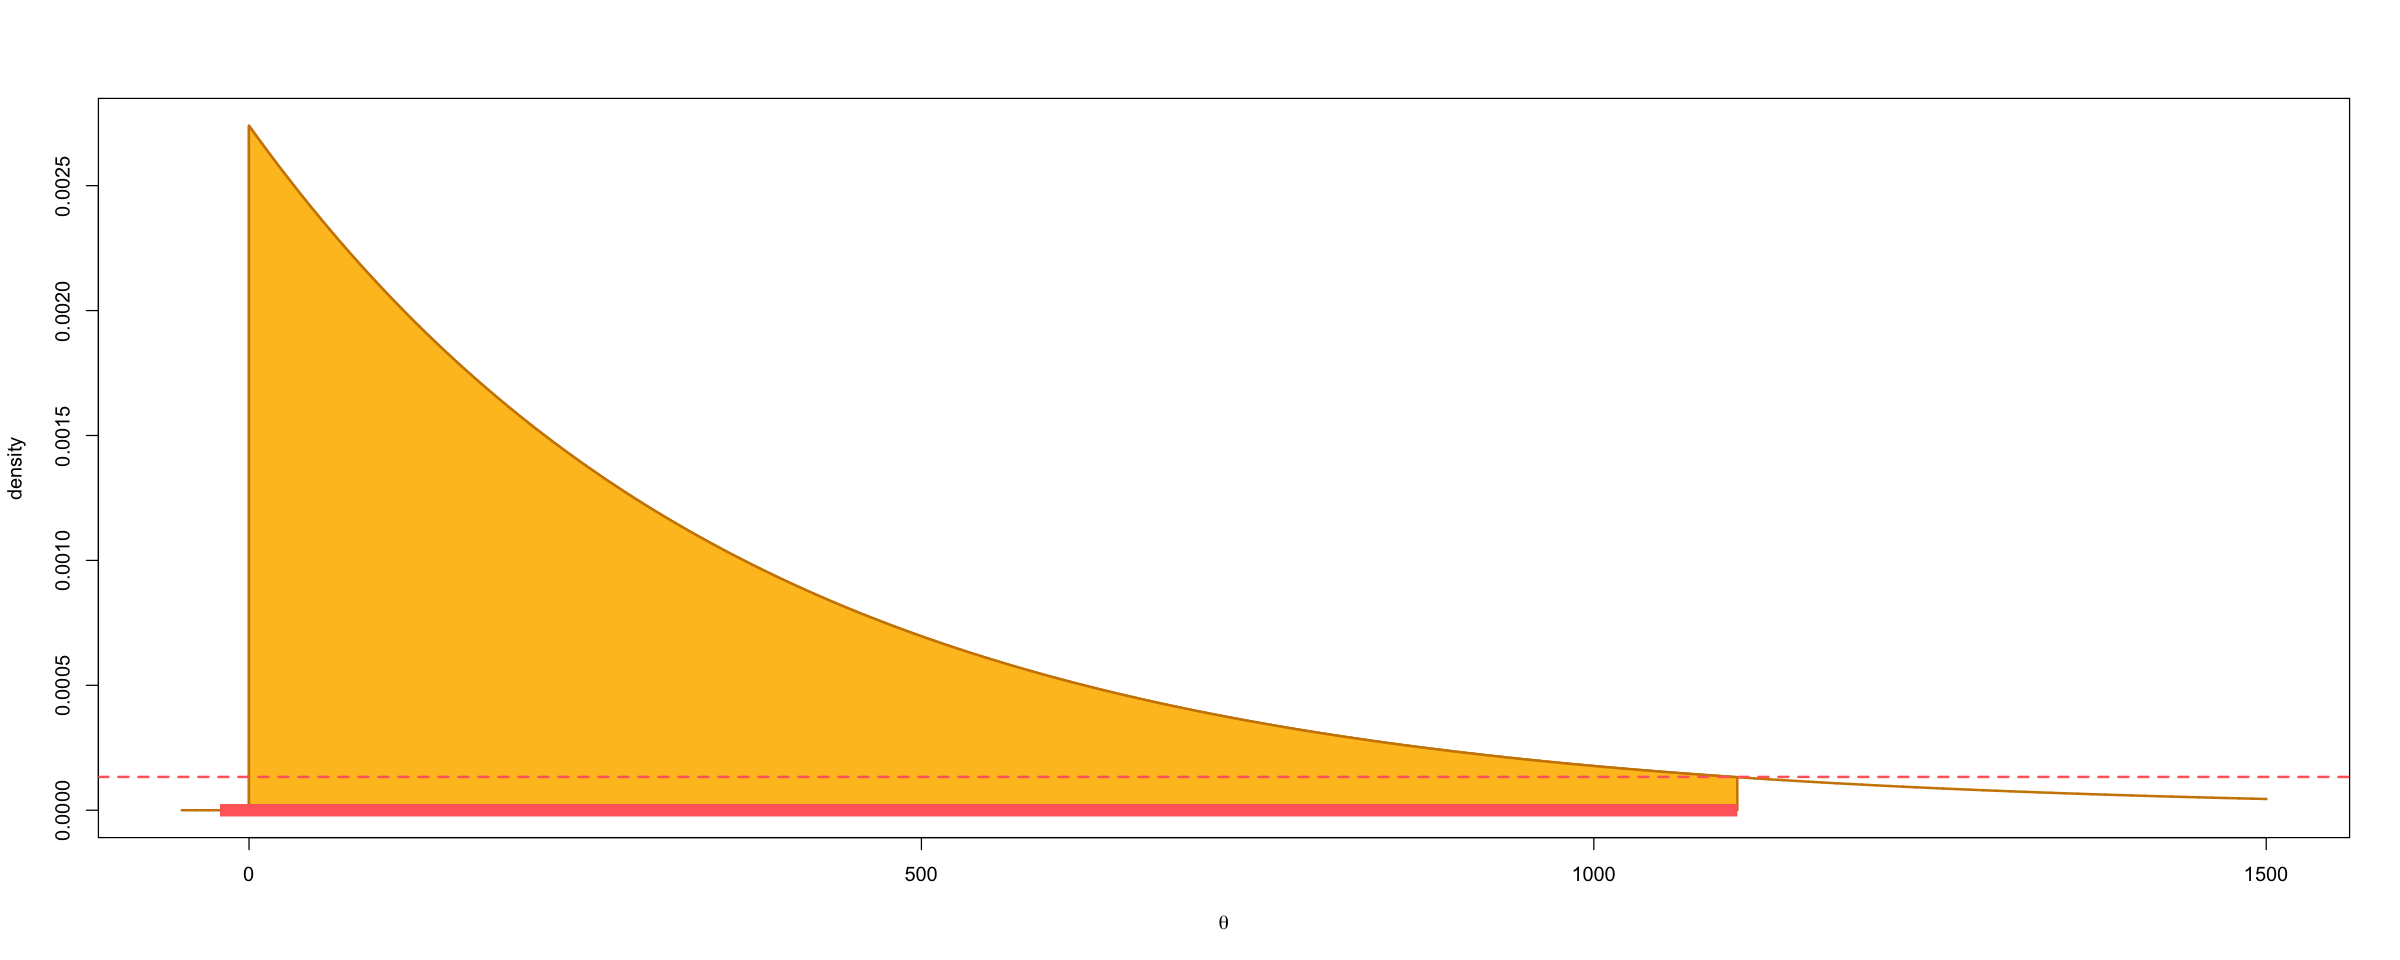

In [314]:

dens <- density(theta)
HPD_region <- HDInterval::hdi(dens, allowSplit = TRUE)
height <- attr(HPD_region, 'height')
lower <- HPD_region[1,1]
upper <- HPD_region[1,2]

x_coord <- c(lower, x[x >= lower & x <= upper], upper)
y_coord <- c(0, y_val[x >= lower & x <= upper], 0)

plot(x, dexp(x, lambda),
     type='l', col = 'orange3', lwd = 2,
     xlab = expression(theta), ylab = 'density')
polygon(x_coord, y_coord, col = 'goldenrod1', lwd = 2,  border = 'orange3')


abline(h = height, col = 'indianred1', lty = 2, lwd = 2)

segments(lower, 0, upper, 0, lwd=10, col='indianred1', lend='butt')

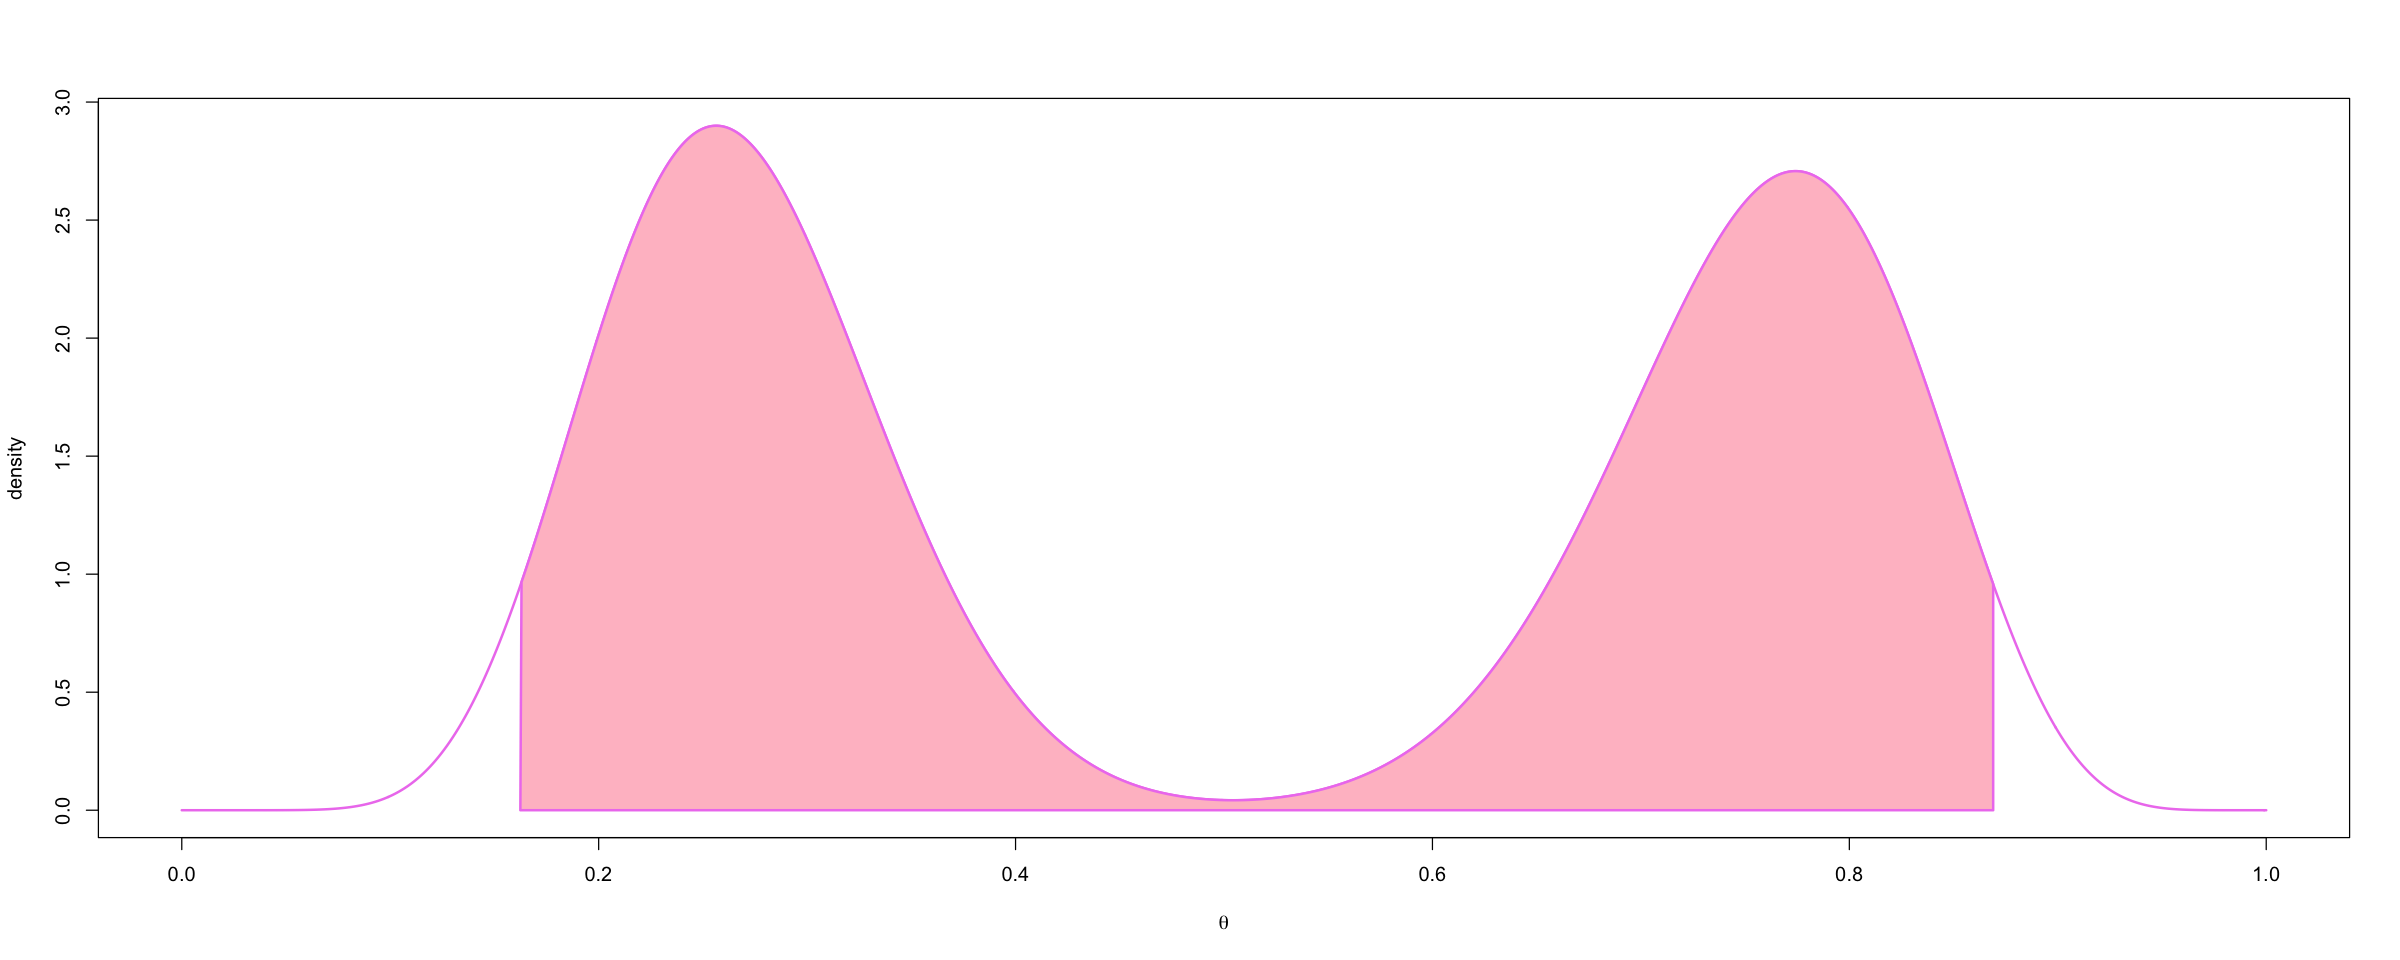

In [251]:
alpha_conf <- .05

alpha_1 <- 11
beta_1 <- 30
alpha_2 <- 25
beta_2 <- 8

mixture_density <- function(x, alpha_1, alpha_2, beta_1, beta_2) {
  .5 * dbeta(x, alpha_1, beta_1) + .5 * dbeta(x, alpha_2, beta_2)
}

# generate data to compute empirical quantiles
n_sim <- 1000000
theta_1 <- rbeta(n_sim / 2, alpha_1, beta_1)
theta_2 <- rbeta(n_sim / 2, alpha_2, beta_2)
theta <- sort(c(theta_1, theta_2))

lower_idx <- round((alpha_conf / 2) * n_sim)
upper_idx <- round((1 - alpha_conf / 2) * n_sim)
q_lower <- theta[lower_idx]
q_upper <- theta[upper_idx]

x <- seq(0,1, by = 0.001)
y_val <- mixture_density(x, alpha_1, alpha_2, beta_1, beta_2)
x_coord <- c(q_lower, x[x >= q_lower & x <= q_upper], q_upper)
y_coord <- c(0, y_val[x >= q_lower & x <= q_upper], 0)

plot(x, mixture_density(x, alpha_1, alpha_2, beta_1, beta_2),
     type='l', col = 'violet', lwd = 2,
     xlab = expression(theta), ylab = 'density')
polygon(x_coord, y_coord, col = 'pink', lwd = 2,  border = 'violet')

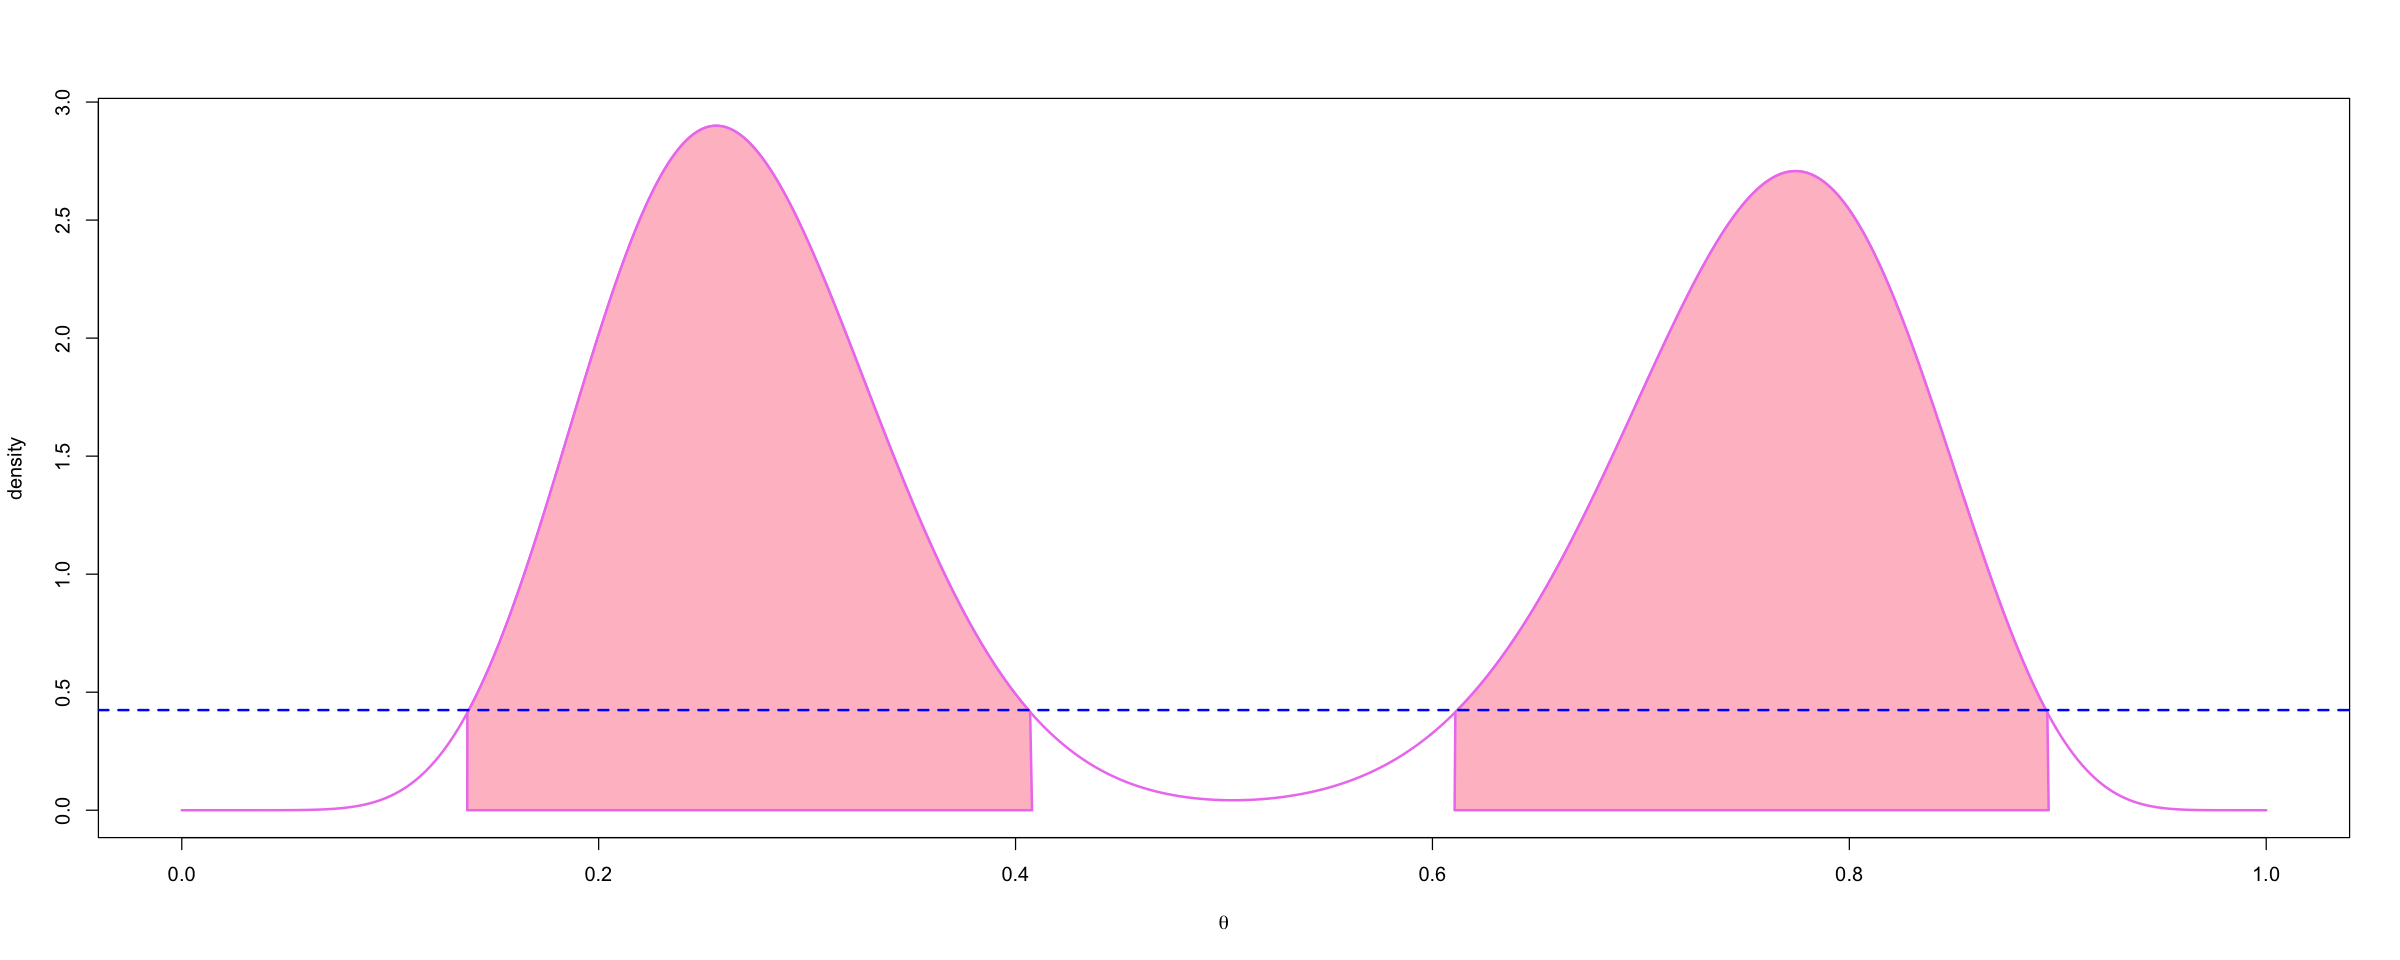

In [254]:

dens <- density(theta)
HPD_region <- HDInterval::hdi(dens, allowSplit = TRUE)
height <- attr(HPD_region, 'height')

plot(x, mixture_density(x, alpha_1, alpha_2, beta_1, beta_2),
     type='l', col = 'violet', lwd = 2,
     xlab = expression(theta), ylab = 'density')

for(i in 1:nrow(HPD_region)){
    
    lower <- HPD_region[i,1]
    upper <- HPD_region[i,2]
    x_coord <- c(lower, x[x >= lower & x <= upper], upper)
    y_coord <- c(0, y_val[x >= lower & x <= upper], 0)
    polygon(x_coord, y_coord, col = 'pink', lwd = 2,  border = 'violet')
    
     }



abline(h = height, col = 'blue', lty = 2, lwd = 2)

In [212]:
delay_mixture <- function(){
    
    on_time_prob <- 0.8911 
    carrier_prob <- 0.0608
    weather_prob <- 0.0036
    nas_prob <- 0.0024
    security_prob <- 0.0006
    late_arr_prob <- 0.0327
    canceled_prob <- 0.0078
    diverted_prob <- 0.001

    mixture <- UnivarMixingDistribution(Norm(mean=-5, sd=2), Norm(mean=15, sd=3),
                                        Norm(mean=10, sd=6), Norm(mean=12, sd=8),
                                        Norm(mean=25, sd=5), Norm(mean=5, sd=1),
                                        Norm(mean=18, sd=2), Norm(mean=45, sd=10),
                                    mixCoeff=c(on_time_prob, carrier_prob, weather_prob, nas_prob, 
                                    security_prob, late_arr_prob, canceled_prob, diverted_prob))
  
    return (mixture)
    }

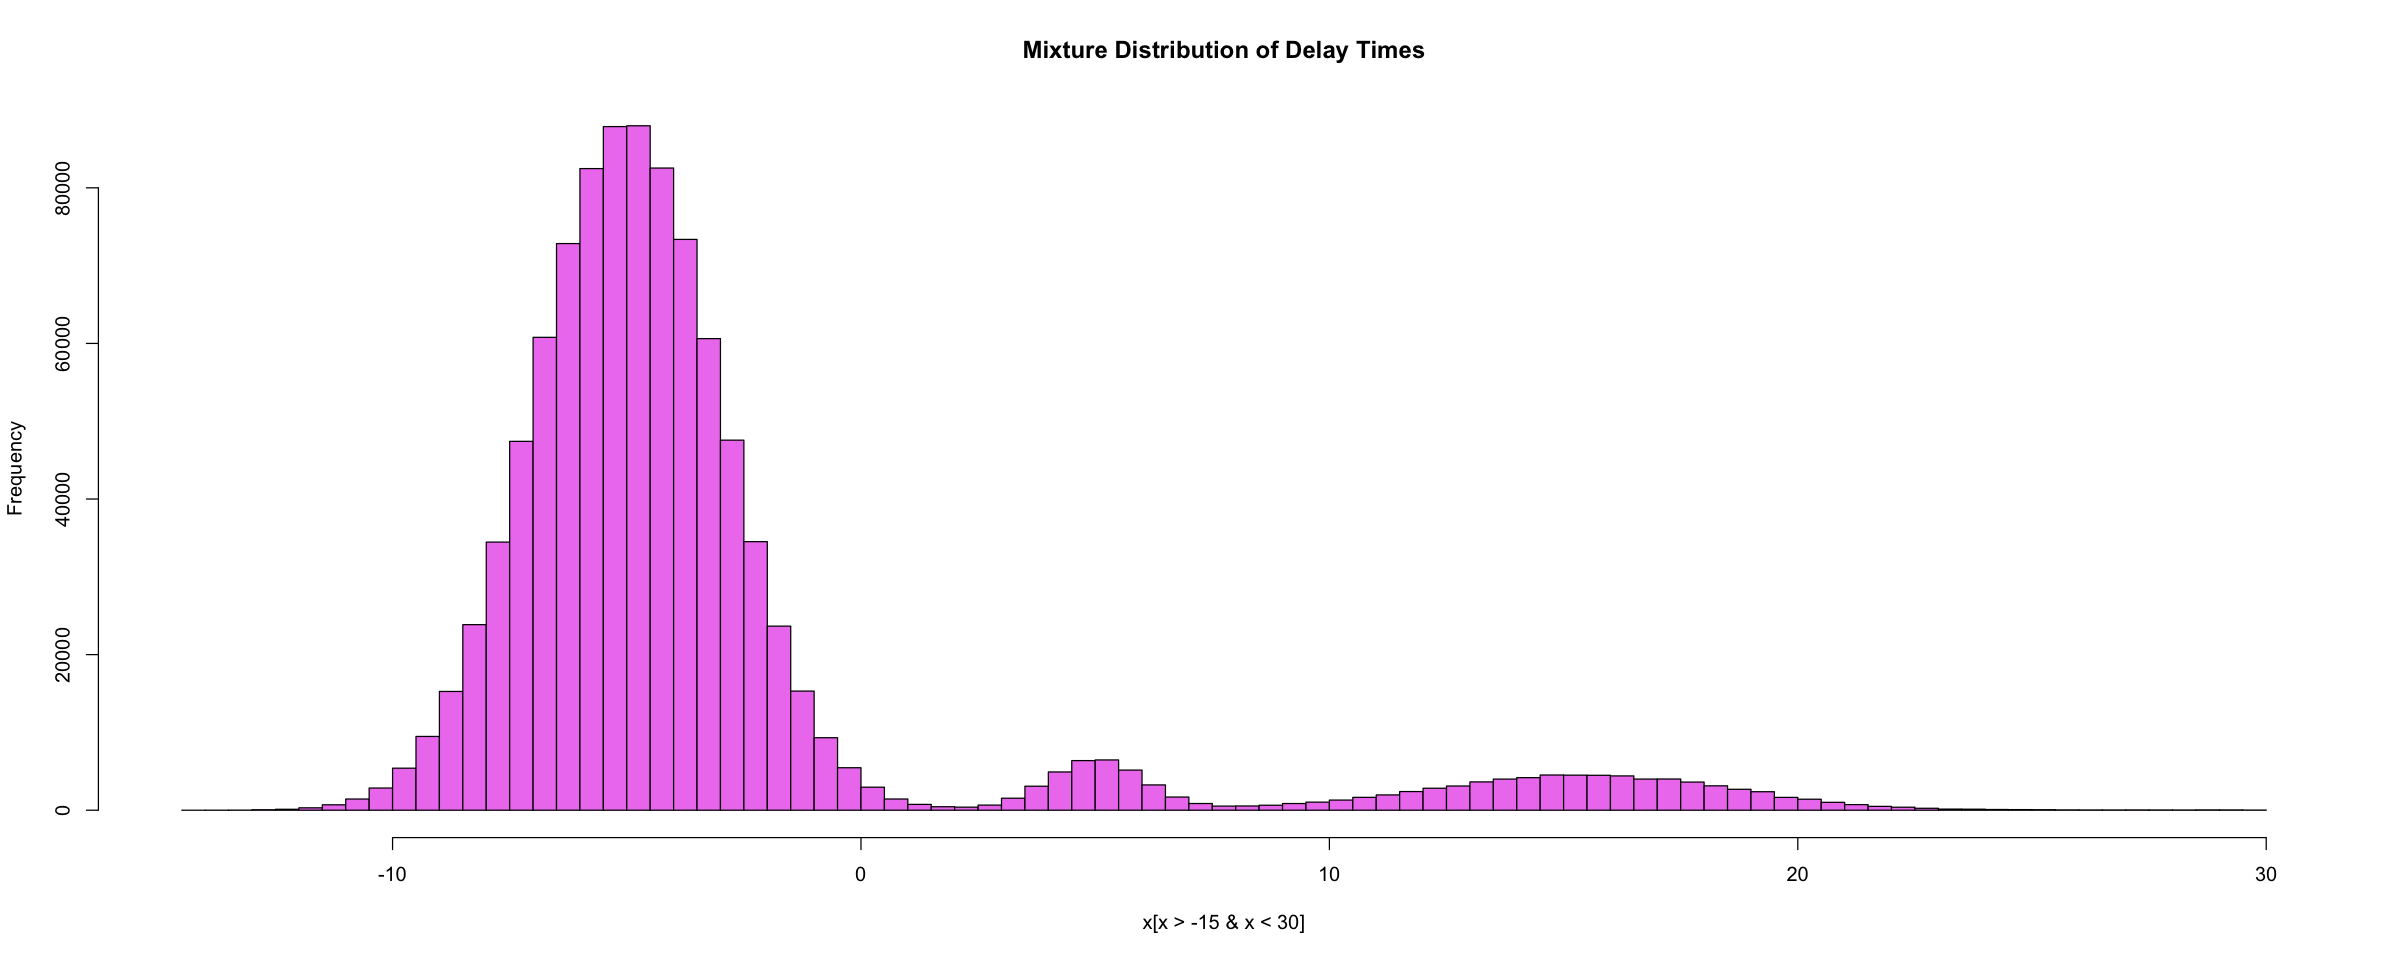

In [213]:
# call distr function r()
mixture <- delay_mixture()
mixture <- r(mixture)

# sample mixture 1,000,000 times    
x <- mixture(1e6)
hist(x[x>-15 & x<30], breaks=150, col='violet', main="Mixture Distribution of Delay Times")

In [ ]:
mixture(1)

In [112]:
options(repr.plot.width=20, repr.plot.height=8)

In [217]:
alpha_conf <- .05

on_time_prob <- 0.8911
    mu_1 <- -5.5
    sig_1 <- 2.8

carrier_prob <- 0.0608
    mu_2 <- 25.7
    sig_2 <- 3.3

weather_prob <- 0.0036
    mu_3 <- 18.6
    sig_3 <- 3.2

nas_prob <- 0.0024
    mu_4 <- 7.3
    sig_4 <- 3.7

security_prob <- 0.0006
    mu_5 <- 25.3
    sig_5 <- 5.5

late_arr_prob <- 0.0327
    mu_6 <- 5.6
    sig_6 <- 1.4

canceled_prob <- 0.0078
    mu_7 <- 24.8
    sig_7 <- 2.7

diverted_prob <- 0.001
    mu_8 <- 22.1
    sig_8 <- 2.2

mixture_density <- function(x, mu_1, sig_1, mu_2, sig_2, mu_3, sig_3, mu_4, sig_4, mu_5, sig_5, mu_6, sig_6, mu_7, sig_7, mu_8, sig_8) {
    
    on_time_prob  * dnorm(x, mu_1, sig_1) + 
    carrier_prob  * dnorm(x, mu_2, sig_2) +
    weather_prob  * dnorm(x, mu_3, sig_3) +
    nas_prob      * dnorm(x, mu_4, sig_4) +
    security_prob * dnorm(x, mu_5, sig_5) +
    late_arr_prob * dnorm(x, mu_6, sig_6) +
    canceled_prob * dnorm(x, mu_7, sig_7) +
    diverted_prob * dnorm(x, mu_8, sig_8) 
    
}

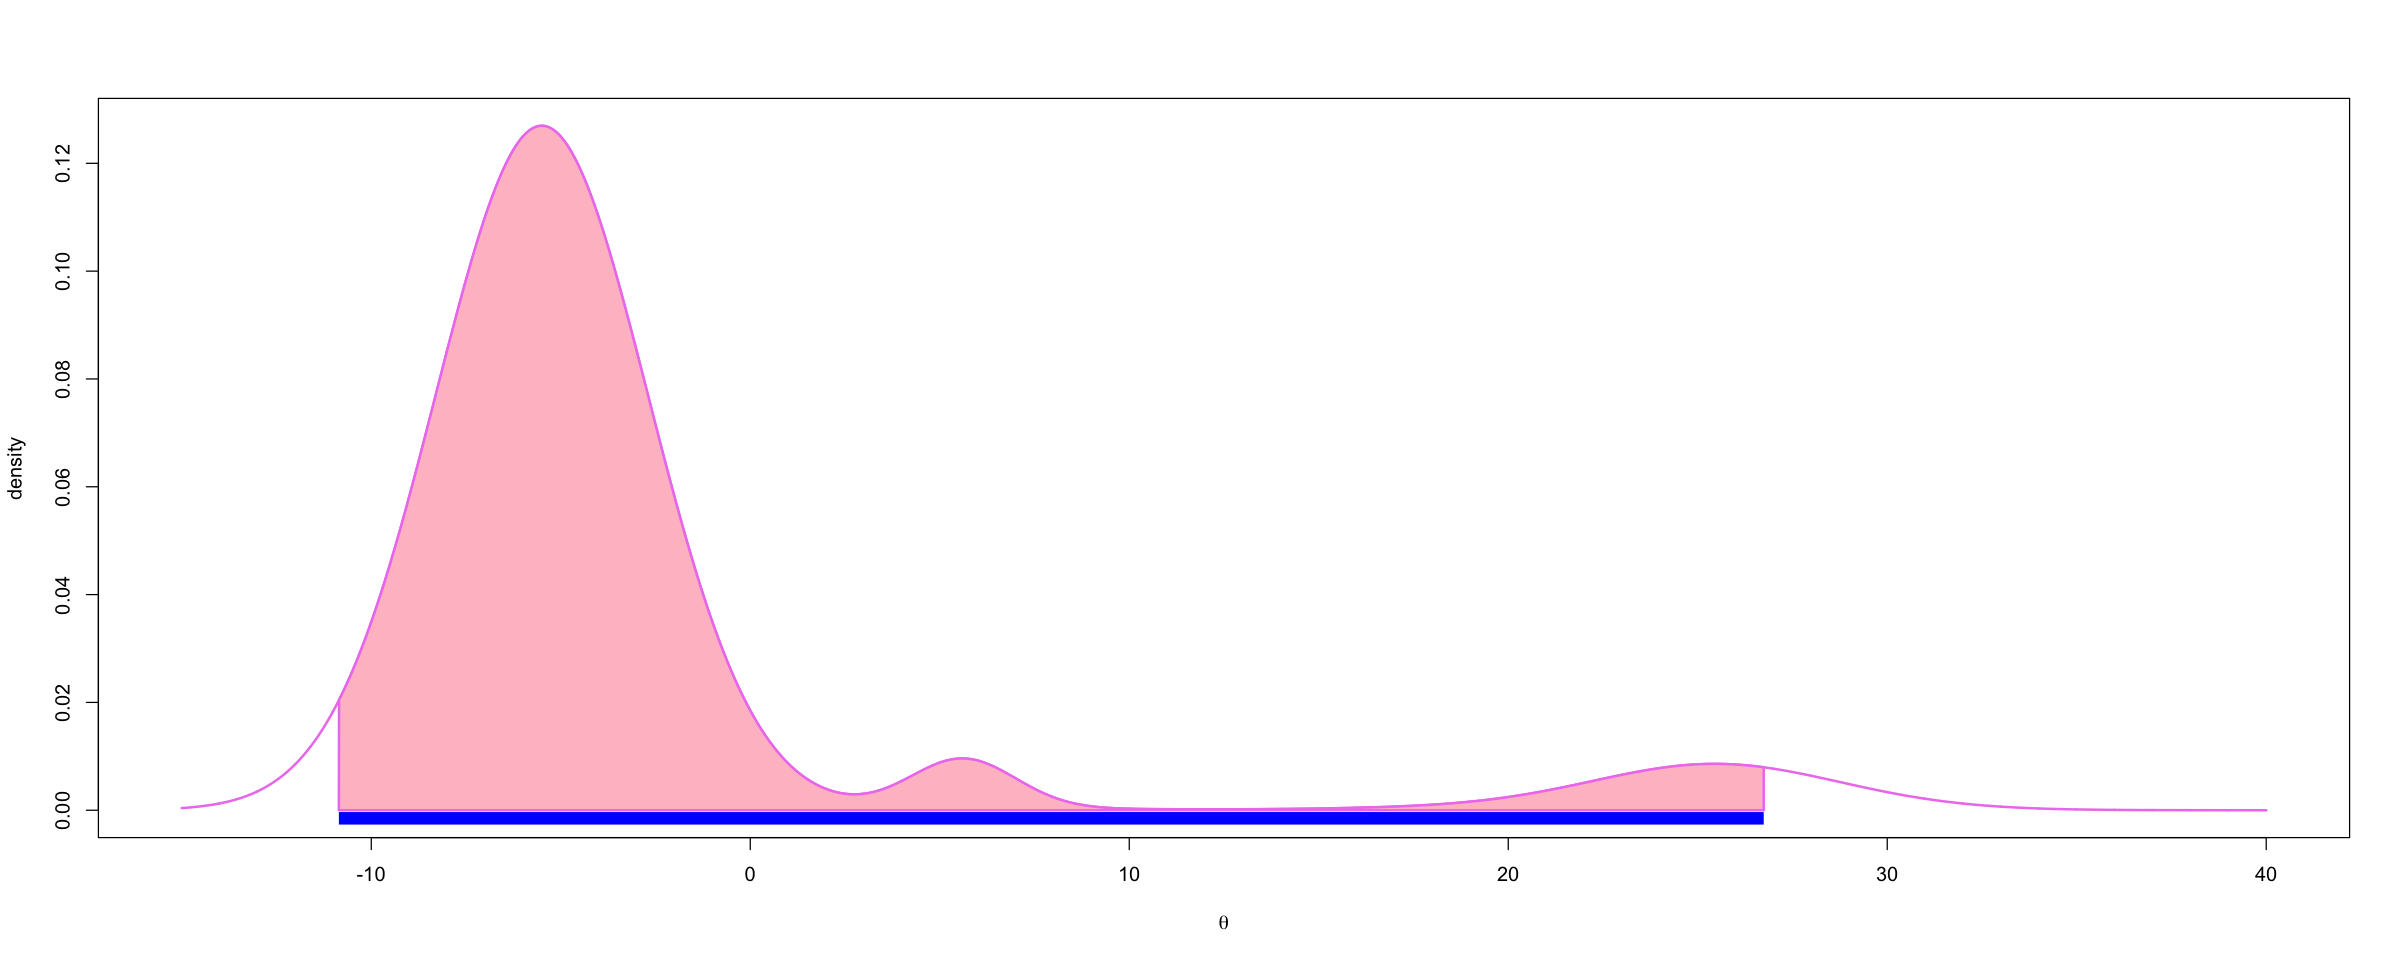

In [233]:
# generate data to compute empirical quantiles
n_sim <- 1000000

theta_1 <- rnorm(on_time_prob  * n_sim, mu_1, sig_1)
theta_2 <- rnorm(carrier_prob  * n_sim, mu_2, sig_2)
theta_3 <- rnorm(weather_prob  * n_sim, mu_3, sig_3)
theta_4 <- rnorm(nas_prob * n_sim, mu_4, sig_4)
theta_5 <- rnorm(security_prob * n_sim, mu_5, sig_5)
theta_6 <- rnorm(late_arr_prob * n_sim, mu_6, sig_6)
theta_7 <- rnorm(canceled_prob * n_sim, mu_7, sig_7)
theta_8 <- rnorm(diverted_prob * n_sim, mu_8, sig_8)

theta <- sort(c(theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7, theta_8))

lower_idx <- round((alpha_conf / 2) * n_sim)
upper_idx <- round((1 - alpha_conf / 2) * n_sim)
q_lower <- theta[lower_idx]
q_upper <- theta[upper_idx]

x <- seq(-15, 40, by = 0.01)
y_val <- mixture_density(x, mu_1, sig_1, mu_2, sig_2, mu_3, sig_3, mu_4, sig_4, mu_5, sig_5, mu_6, sig_6, mu_7, sig_7, mu_8, sig_8)

x_coord <- c(q_lower, x[x >= q_lower & x <= q_upper], q_upper)
y_coord <- c(0, y_val[x >= q_lower & x <= q_upper], 0)

plot(x, y_val,
     type='l', col = 'violet', lwd = 2,
     xlab = expression(theta), ylab = 'density')

polygon(x_coord, y_coord, col = 'pink', lwd = 2,  border = 'violet')

segments(q_lower, -0.0015, q_upper, -0.0015, lwd=10, col='blue', lend='butt')

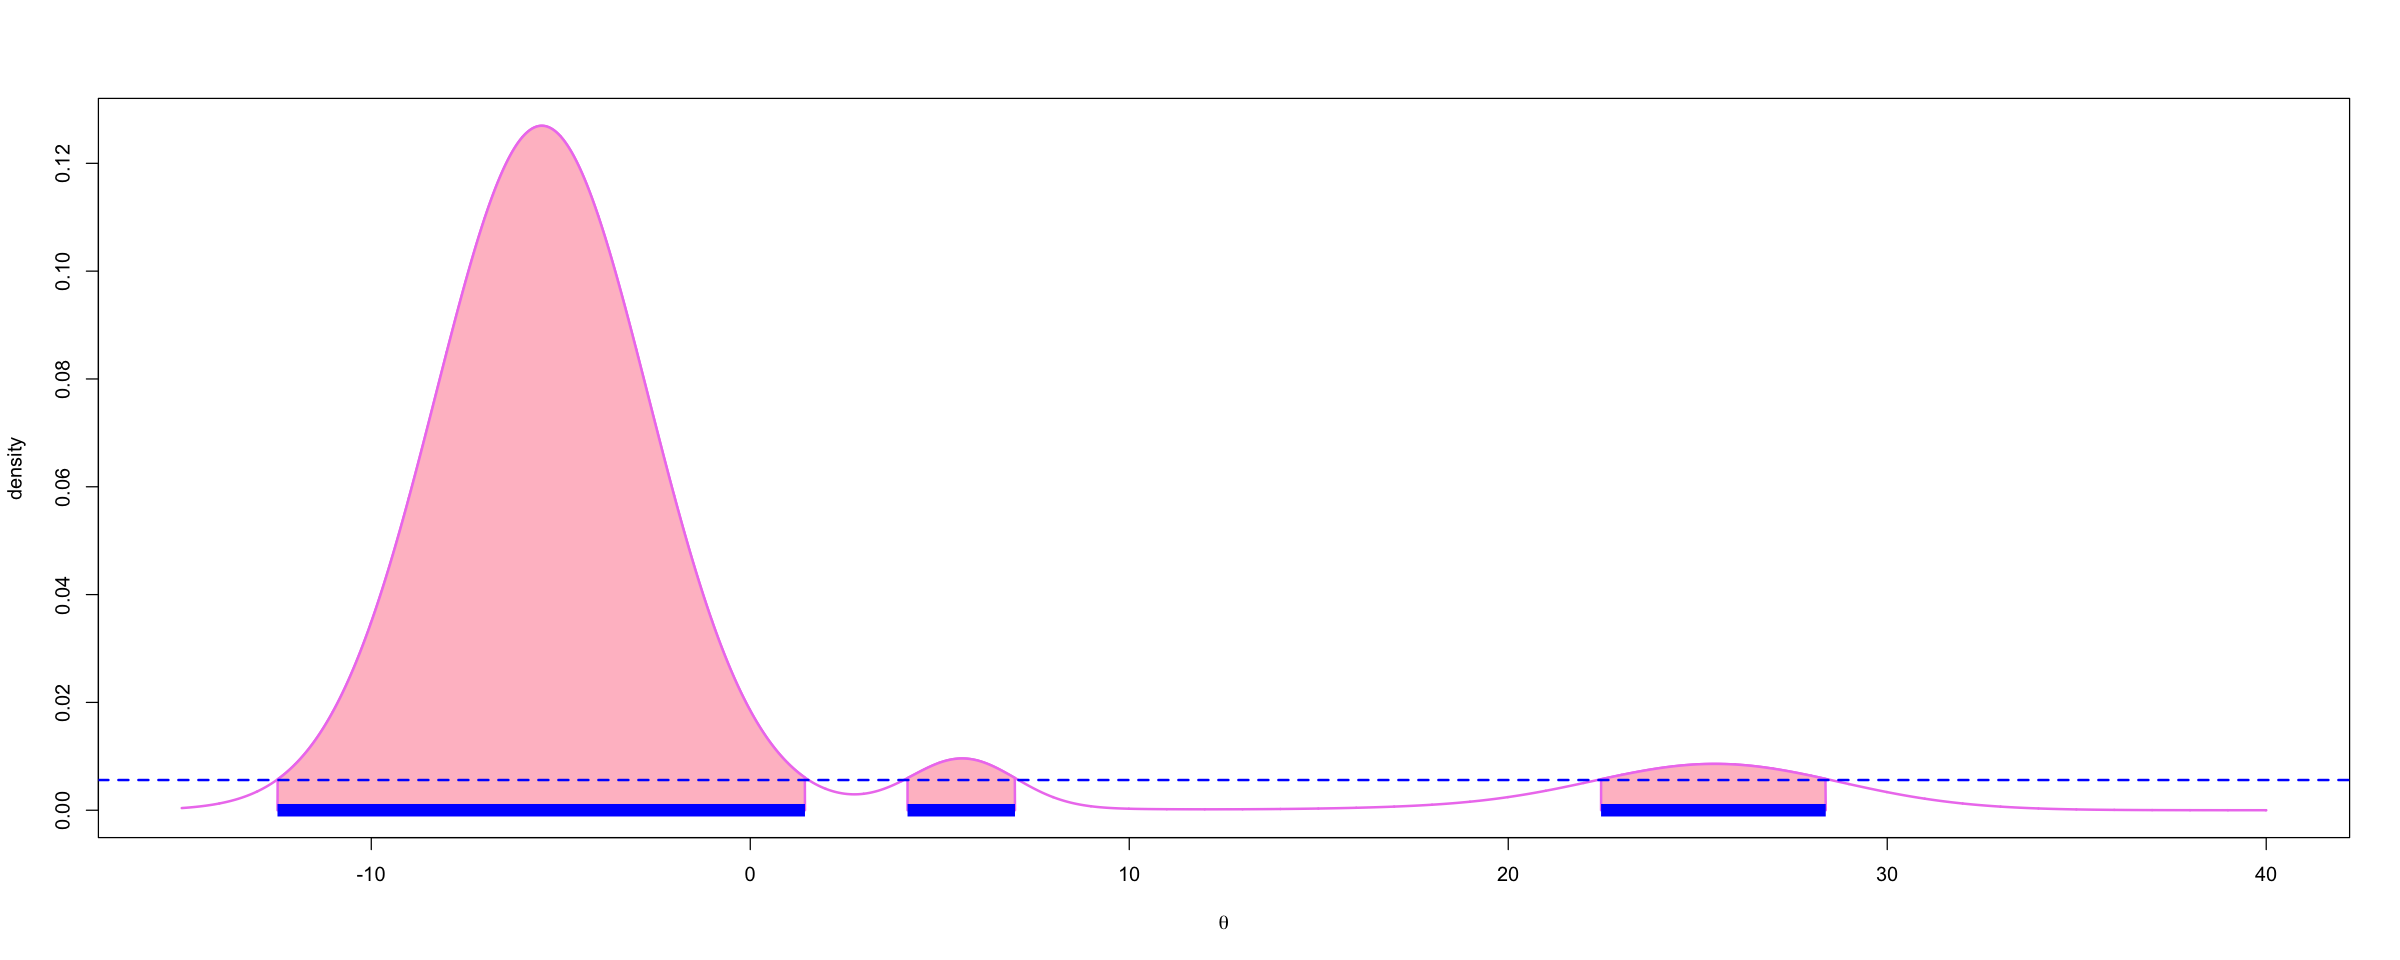

In [250]:

n_sim <- 1000000

theta_1 <- rnorm(on_time_prob  * n_sim, mu_1, sig_1)
theta_2 <- rnorm(carrier_prob  * n_sim, mu_2, sig_2)
theta_3 <- rnorm(weather_prob  * n_sim, mu_3, sig_3)
theta_4 <- rnorm(nas_prob * n_sim, mu_4, sig_4)
theta_5 <- rnorm(security_prob * n_sim, mu_5, sig_5)
theta_6 <- rnorm(late_arr_prob * n_sim, mu_6, sig_6)
theta_7 <- rnorm(canceled_prob * n_sim, mu_7, sig_7)
theta_8 <- rnorm(diverted_prob * n_sim, mu_8, sig_8)

theta <- sort(c(theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7, theta_8))


dens2 <- density(theta)
HPD_region2 <- HDInterval::hdi(dens2, credMass = 0.95, allowSplit = TRUE)
height <- attr(HPD_region2, 'height')


x <- seq(-15, 40, by = 0.01)
y_val <- mixture_density(x, mu_1, sig_1, mu_2, sig_2, mu_3, sig_3, mu_4, sig_4, mu_5, sig_5, mu_6, sig_6, mu_7, sig_7, mu_8, sig_8)


plot(x, y_val,
     type='l', col = 'violet', lwd = 2,
     xlab = expression(theta), ylab = 'density')


for(i in 1:nrow(HPD_region2)){
    
    lower <- HPD_region2[i,1]
    upper <- HPD_region2[i,2]
    x_coord <- c(lower, x[x >= lower & x <= upper], upper)
    y_coord <- c(0, y_val[x >= lower & x <= upper], 0)
    polygon(x_coord, y_coord, col = 'pink', lwd = 2,  border = 'violet')
    
     }


segments(HPD_region2[, 1], 0, HPD_region2[, 2], 0, lwd=10, col='blue', lend='butt')

abline(h = height, col = 'blue', lty = 2, lwd = 2)




In [151]:
HPD_region2

begin,end
-12.408705,1.508874
4.148415,7.027914
22.625200,28.504178


In [142]:
height

[1] 0.005685487

In [143]:
HPD_region2[3,1]

begin 
22.39024

In [144]:
HPD_region2[3,2]

end 
27.64534

lower     upper 
-9.969636 24.372474 
attr(,"credMass")
[1] 0.95

begin,end
-10.109322,0.245487
3.750192,6.299068
22.388849,27.645906


[1] 0.005684102

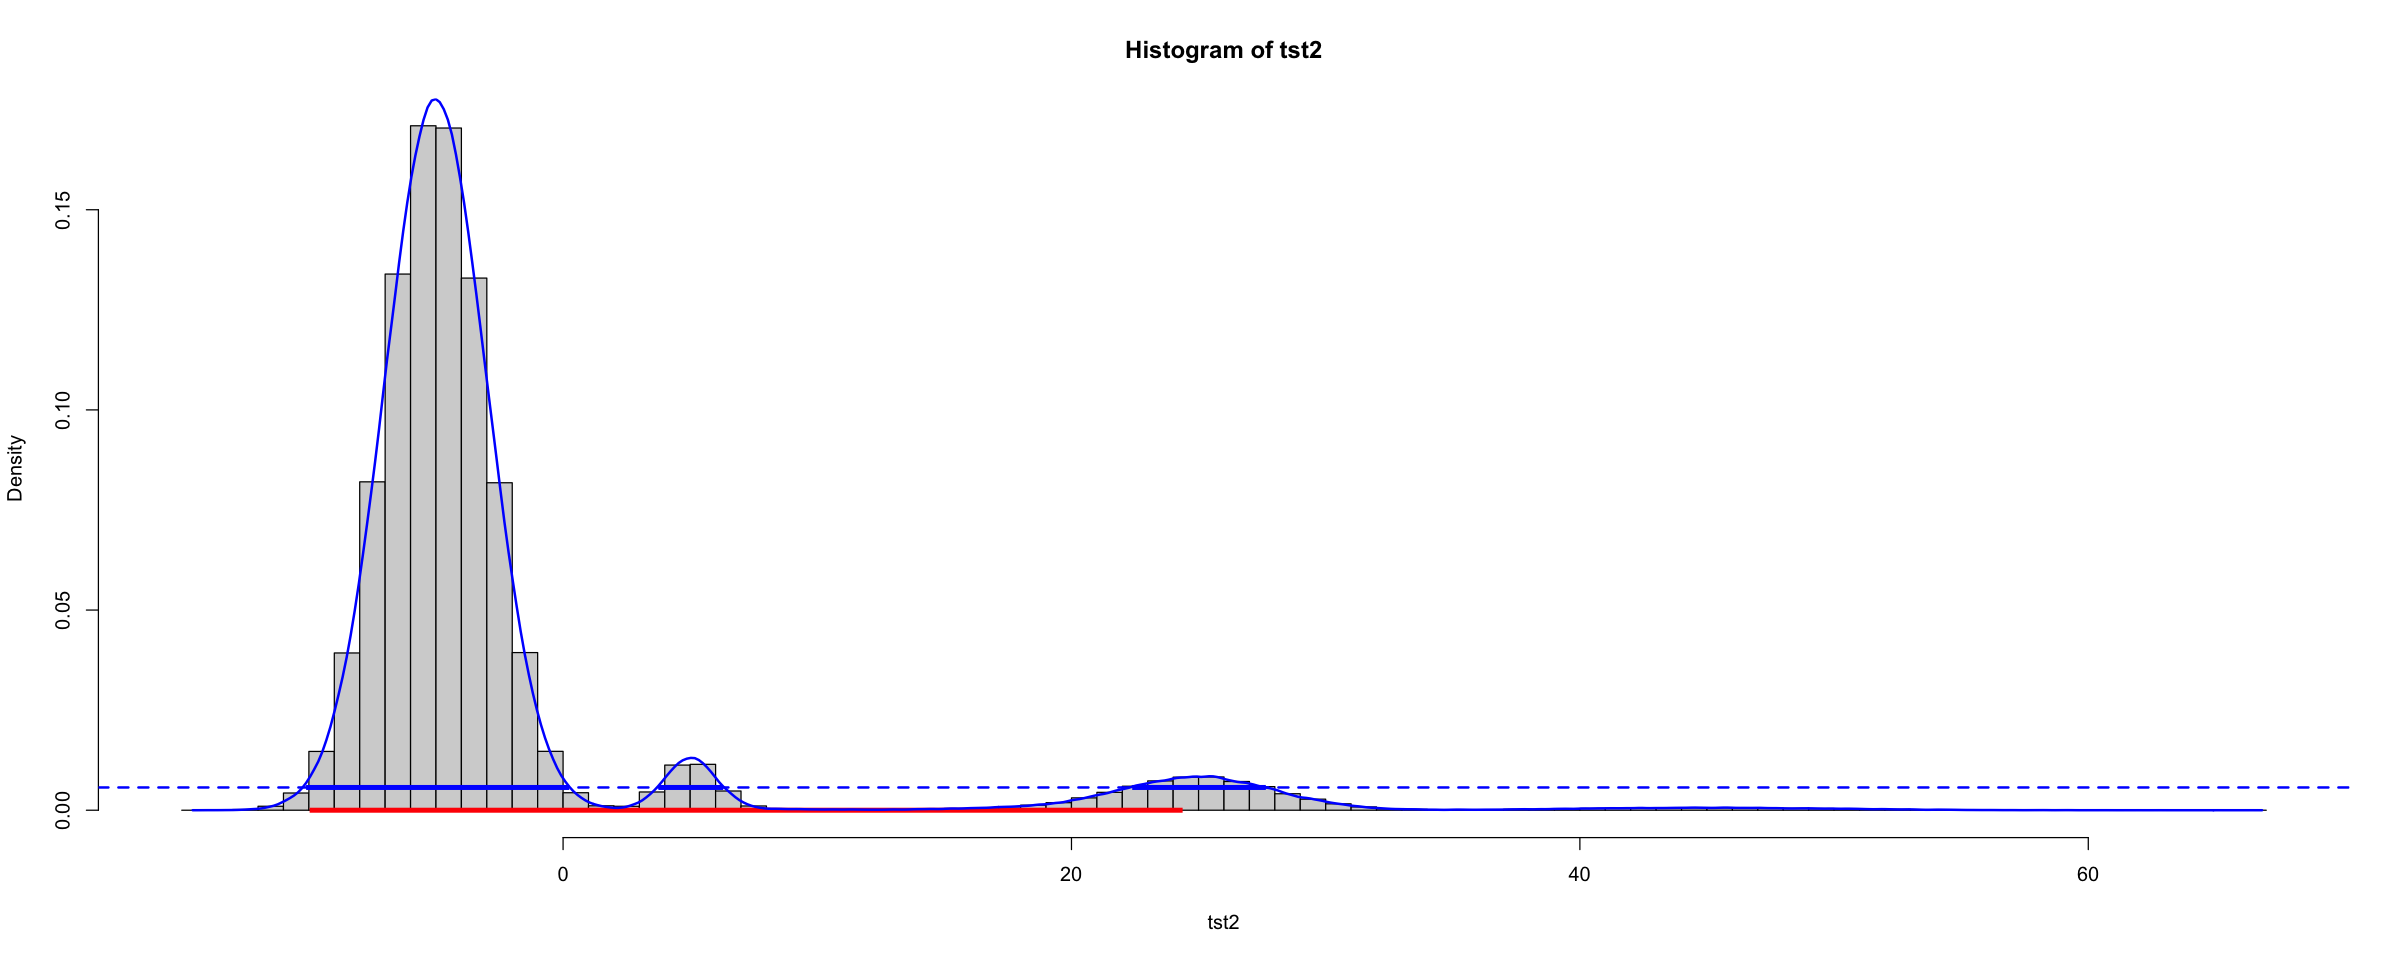

In [145]:
# A multimodal distribution:
set.seed(2020)
tst2 <- theta #c(rnorm(500, 30, 3), rnorm(200, 50, 1.5), 60 + rexp(200, 0.1))
hist(tst2, breaks = 100, freq=FALSE)
(hdiMC <- hdi(tst2))
segments(hdiMC[1], 0, hdiMC[2], 0, lwd=4, col='red', lend='butt')
# This is a valid 95% CrI, but not a Highest Density Interval

dens2 <- density(tst2, bw="SJ") # not the default for 'bw', see ?density
lines(dens2, lwd=2, col='blue')
(hdiD <- hdi(dens2, allowSplit=TRUE))
(ht <- attr(hdiD, "height"))
segments(hdiD[, 1], ht, hdiD[, 2], ht, lwd=4, col='blue', lend='butt')
# This is the correct 95% HDI.
abline(h = ht, col = 'blue', lty = 2, lwd = 2)